In [100]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_rows', 400)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
import json

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px

import seaborn
from sklearn import manifold

In [101]:
for dirname, _, filenames in os.walk('/Desktop/TFG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
warnings.filterwarnings('ignore')

In [102]:
hs=pd.read_csv("handball_stats.csv")
lb=pd.read_csv("Clasificacion.csv")
jornadas=pd.read_csv("Jornadas3.csv")

## Diccionario de los datos
**NAME**: Nombre del jugador, cadena de texto.

**CLUB**: Club en el que el jugador está jugando actualmente (18 clubes en total), cadena de texto.

**POSITION**: Posición del jugador (7 posiciones en total), cadena de texto.

**P**: Número de partidos jugados por el jugador esta temporada, numérico.

**G**: Número de goles que el jugador ha marcado esta temporada, numérico.

**M**: Número de tiros que el jugador ha fallado esta temporada, numérico.

**FG**: Número de goles de campo que el jugador ha marcado esta temporada (G - G.1), numérico.

**G.1**: Número de penaltis que el jugador ha marcado esta temporada (G - FG), numérico.

**%**: Porcentaje de tiros del jugador esta temporada (G/(G+M)*100), cadena de texto.

**AS**: Número de asistencias que el jugador ha dado esta temporada, numérico.

**TF**: Número de faltas técnicas que el jugador ha cometido esta temporada, numérico.

**ST**: Número de robos de balón que el jugador ha realizado esta temporada, numérico.

**BL**: Número de tiros que el jugador ha bloqueado esta temporada, numérico.

**YC**: Número de tarjetas amarillas que el jugador ha recibido esta temporada, numérico.

**2MIN**: Número de suspensiones de dos minutos que el jugador ha recibido esta temporada (generalmente por faltas duras), numérico.

**RC**: Número de tarjetas rojas que el jugador ha recibido esta temporada (pueden ser recibidas directamente o tras recibir tres suspensiones de 2 minutos en un juego), numérico.

**BK**: Número de tarjetas azules que el jugador ha recibido esta temporada (generalmente después de una falta muy dura o por problemas con el árbitro), numérico.

**HPI**: Índice de rendimiento en balonmano promedio (método sofisticado creado por los ingenieros de la liga para medir el rendimiento de los jugadores en los partidos), numérico.


In [103]:
hs

,NAME,CLUB,POSITION,P,G,M,FG,G.1,%,AS,TF,ST,BL,YC,2MIN,RC,BK,HPI
0,Mortensen Casper Ulrich,Handball Sportverein Hamburg,LW,28,206,83,137,69,71.28%,9,19,17,0,1,6,0,0,77.0
1,Knorr Juri,Rhein-Neckar Löwen,CB,29,178,103,114,64,63.35%,100,80,4,3,1,3,1,0,71.0
2,Steinert Christoph,HC Erlangen,RB,30,166,83,81,85,66.67%,42,34,6,5,1,4,0,0,72.0
3,Blohme Lukas,VfL Gummersbach,RW,30,165,69,152,13,70.51%,14,16,11,1,2,8,1,0,74.0
4,Smits Kay,SC Magdeburg,RB,30,164,65,99,65,71.62%,44,29,4,2,0,5,0,0,74.0
5,Jakobsen Emil,SG Flensburg-Handewitt,LW,30,160,52,111,49,75.47%,6,13,2,0,2,3,0,0,74.0
6,Kristjansson Gisli Thorgeir,SC Magdeburg,CB,29,147,63,147,0,70.00%,98,66,1,3,1,5,0,0,74.0
7,Rubin Lenny,HSG Wetzlar,LB,30,141,121,141,0,53.82%,49,45,8,18,2,17,0,0,70.0
8,KristjÃ¡nsson ViggÃ³,SC DHfK Leipzig,RB,23,135,74,78,57,64.59%,72,59,5,1,1,10,0,0,70.0
9,Lindberg Hans,Füchse Berlin,RW,24,134,36,63,71,78.82%,3,7,6,0,0,2,1,0,76.0


In [104]:
hs[hs["POSITION"] == "RW"].sort_values(by="HPI", ascending=False)

,NAME,CLUB,POSITION,P,G,M,FG,G.1,%,AS,TF,ST,BL,YC,2MIN,RC,BK,HPI
9,Lindberg Hans,Füchse Berlin,RW,24,134,36,63,71,78.82%,3,7,6,0,0,2,1,0,76.0
121,Weber Robert,Füchse Berlin,RW,11,55,18,32,23,75.34%,2,2,2,0,0,0,0,0,76.0
18,Groetzki Patrick,Rhein-Neckar Löwen,RW,28,117,36,117,0,76.47%,20,13,13,0,1,6,0,0,75.0
22,Andersen Frederik Bo,Handball Sportverein Hamburg,RW,28,112,29,102,10,79.43%,9,7,10,0,0,5,0,0,75.0
34,Zerbe Lukas,TBV Lemgo Lippe,RW,29,104,37,90,14,73.76%,4,9,7,2,2,5,0,0,74.0
3,Blohme Lukas,VfL Gummersbach,RW,30,165,69,152,13,70.51%,14,16,11,1,2,8,1,0,74.0
16,Ekberg Niclas,THW Kiel,RW,27,119,37,54,65,76.28%,4,7,8,1,0,2,0,0,74.0
31,Gerbl Maximilian,TSV Hannover-Burgdorf,RW,30,108,35,49,59,75.52%,6,6,8,0,3,4,0,0,73.0
47,Steinhauser Marius,TSV Hannover-Burgdorf,RW,25,92,34,62,30,73.02%,0,7,6,0,4,3,0,0,73.0
72,Olsson Hampus,HC Erlangen,RW,24,81,26,73,8,75.70%,2,11,9,0,1,1,0,0,73.0


In [105]:
hs[:100]

,NAME,CLUB,POSITION,P,G,M,FG,G.1,%,AS,TF,ST,BL,YC,2MIN,RC,BK,HPI
0,Mortensen Casper Ulrich,Handball Sportverein Hamburg,LW,28,206,83,137,69,71.28%,9,19,17,0,1,6,0,0,77.0
1,Knorr Juri,Rhein-Neckar Löwen,CB,29,178,103,114,64,63.35%,100,80,4,3,1,3,1,0,71.0
2,Steinert Christoph,HC Erlangen,RB,30,166,83,81,85,66.67%,42,34,6,5,1,4,0,0,72.0
3,Blohme Lukas,VfL Gummersbach,RW,30,165,69,152,13,70.51%,14,16,11,1,2,8,1,0,74.0
4,Smits Kay,SC Magdeburg,RB,30,164,65,99,65,71.62%,44,29,4,2,0,5,0,0,74.0
5,Jakobsen Emil,SG Flensburg-Handewitt,LW,30,160,52,111,49,75.47%,6,13,2,0,2,3,0,0,74.0
6,Kristjansson Gisli Thorgeir,SC Magdeburg,CB,29,147,63,147,0,70.00%,98,66,1,3,1,5,0,0,74.0
7,Rubin Lenny,HSG Wetzlar,LB,30,141,121,141,0,53.82%,49,45,8,18,2,17,0,0,70.0
8,KristjÃ¡nsson ViggÃ³,SC DHfK Leipzig,RB,23,135,74,78,57,64.59%,72,59,5,1,1,10,0,0,70.0
9,Lindberg Hans,Füchse Berlin,RW,24,134,36,63,71,78.82%,3,7,6,0,0,2,1,0,76.0


In [106]:
lb

,Clasificacion,Equipo,Partidos,Victorias,Empates,Derrotas,GF,GC,DG,PTS
0,1,THW Kiel,34,29,1,4,1098,917,181,59
1,2,SC Magdeburg,34,27,3,4,1124,982,142,57
2,3,Füchse Berlin,34,25,1,8,1103,990,113,51
3,4,SG Flensburg-Handewitt,34,23,3,8,1062,929,133,49
4,5,Rhein-Neckar Löwen,34,22,1,11,1133,1025,108,45
5,6,TSV Hannover-Burgdorf,34,18,2,14,994,978,16,38
6,7,Handball Sportverein Hamburg,34,17,2,15,1028,1010,18,36
7,8,TBV Lemgo Lippe,34,16,3,15,1013,1010,3,35
8,9,MT Melsungen,34,14,6,14,910,923,-13,34
9,10,VfL Gummersbach,34,15,3,16,1036,1038,-2,33


In [107]:
jornadas

,Round,Home,HG,AG,Away,Season,Res,W,L
0,1,Handball Sportverein Hamburg,30,31,SG Flensburg-Handewitt,2022,A,31,30
1,1,TBV Lemgo Lippe,26,30,VfL Gummersbach,2022,A,30,26
2,1,TSV Hannover-Burgdorf,25,22,SC DHfK Leipzig,2022,H,25,22
3,1,HC Erlangen,31,27,HSG Wetzlar,2022,H,31,27
4,1,Rhein-Neckar Löwen,36,25,MT Melsungen,2022,H,36,25
...,...,...,...,...,...,...,...,...,...
913,34,THW Kiel,42,35,FRISCH AUF! Göppingen,2021,H,42,35
914,34,HC Erlangen,33,26,Balingen-Weilstetten,2021,H,33,26
915,34,Füchse Berlin,22,28,SG Flensburg-Handewitt,2021,A,28,22
916,34,TSV Hannover-Burgdorf,26,26,SC DHfK Leipzig,2021,D,26,26


https://www.ndr.de/sport/ergebnisse/handball/2022-2023/handballmaenner400_matchDay-1.html

Llista d'idees per redactar l'introducció. Pressupost per estadístiques, limitació. 


hacer resumen en word, 
replicar articulo fácil
conseguir mas temporadas
intentar empezar el indice TFG

## Posibles preguntas

### 1 Analisi exploratiori jugadors

1. ¿Qué equipo ha tenido una mejor eficiencia de cara a portería?.
2. Jugadores con mejor promedio de goles por partido.
### Analisi exploratori equips
4. Equipos menos goleados.
3. Equipos con más promedio de goles por partido. (https://www.playmakerstats.com/edition/liqui-moly-handball-bundesliga-2022-23/166339?jornada_in=1&fase=165051)
5. Relación entre equipos que más faltas técnicas han provocado y su índice de victorias.
6. ¿Dónde juegan los mejores jugadores de cada posición? Relación entre mejores posiciones y clasificación del equipo.
En quina posicio has de tenir un bon jugador per guanyar. Correlacio entre posicions i victories.
7. Equipos que mejores resultados obtienen como locales.
8. Periodo de mejor rendimiento de un equipo concreto (https://github.com/footballcsv/espana/blame/master/2010s/2013-14/es.1.csv)
9. Equipos más goleados por un equipo.

### preguntes més complexes
10. Jugadores más determinantes de un equipo. (Decidir calculo, o usar el indice de rendimiento HPI).
11. Quin jugador hem d'incorporar en el nostre equip per millorar els resultats l'any que ve?.
FEature selection problem
Es robusta la solución?
12. Quin equip guanyarà la temporada que ve?
13. El equipo X ganarà el partido siguiente contra el equipo Y? / Ganará el equipo local el partido?
14. 
problema de predicción de la clasificación
Tenemos el equipo descrito por las 9 dimensiones.
Entrenar un clasificador binario con el conjunto de datos de la temporada. Que son resultado de ganará/no ganará entre diferentes ejemplos. 

#### TODO
Mirar que usan en futbol como descriptor del equipo, como vector de características del equipo. 
https://www.researchgate.net/publication/361301886_Model_to_Predict_the_Result_of_a_Soccer_Match_Based_on_the_Number_of_Goals_Scored_by_a_Single_Team
https://pmc.ncbi.nlm.nih.gov/articles/PMC10393150/
Mirar que usan como clasificador.
Cómo calculan la probabilidad de victorias en el futbol?

14. L'equip X guanyarà l'any que ve?
problema de predicción de la clasificación


Describir vector de caracteristicas del equipo, decidir las características. HPI por posición. El vector de caracteristicas de cada equipo es de dimensión 9
Suponiendo que los jugadores de cada equipo no cambian.
En esa nube de puntos

Analizar el rol mas importante en el que tener un buen jugador

Cual es la posicion mas importante para tener una buena clasificacion en la liga?

Hay una correlacion entre alguna de las posiciones con alto indice y ganar?

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Cargar la imagen
image_path = 'campo balonmano.png'
image = Image.open(image_path)

# Factor de escala
scale_factor = 3  # Incrementa este valor para aumentar el tamaño general

# Redimensionar la imagen
new_width = int(image.width * scale_factor)
new_height = int(image.height * scale_factor)
image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Escalar las coordenadas de las posiciones
data = {
    'x': [30, 50, 295, 540, 540, 295, 295],
    'y': [50, 250, 310, 250, 50, 200, 30],
    'POSITION': ['RW', 'RB', 'CB', 'LB', 'LW', 'PV', 'GK']
}
coordenadas_por_posicion = pd.DataFrame(data)
coordenadas_por_posicion['x'] *= scale_factor
coordenadas_por_posicion['y'] *= scale_factor

# Calcular la media de HPI por posición
hpi_media_por_posicion = hs.groupby('POSITION')['HPI'].mean().reset_index()

# Unir las coordenadas con los valores de HPI
df_resultado = pd.merge(coordenadas_por_posicion, hpi_media_por_posicion, on='POSITION')

# Crear una instancia de dibujo sobre la imagen
draw = ImageDraw.Draw(image)

# Escalar el tamaño de la fuente
font_size = int(12 * scale_factor)
try:
    font = ImageFont.truetype("arial.ttf", font_size)
except IOError:
    font = ImageFont.load_default()

# Normalizar los valores de HPI para ajustar los radios de las elipses
max_hpi = df_resultado['HPI'].max()
min_hpi = df_resultado['HPI'].min()

# Dibujar cada punto en la imagen con tamaño proporcional al HPI medio
for index, row in df_resultado.iterrows():
    x, y, posicion, hpi_medio = row['x'], row['y'], row['POSITION'], row['HPI']
    
    # Calcular el radio proporcional al HPI medio (ajustado al factor de escala)
    radius = (5 + (hpi_medio - min_hpi) / (max_hpi - min_hpi) * 20) * scale_factor

    # Dibujar la elipse
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill='red', outline='red')

    # Mostrar el nombre de la posición y el valor
    draw.text((x - radius, y + radius + 10 * scale_factor), f'{posicion}: {hpi_medio:.2f}', fill='black', font=font)

# Mostrar la imagen
plt.figure(figsize=(12, 8))  # Ajustar el tamaño del gráfico en Matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ivanm\\Desktop\\TFG\\campo balonmano.png'

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Cargar la imagen
image_path = 'campo balonmano.png'
image = Image.open(image_path)

# Calcular la cantidad total de goles y lanzamientos por posición
hs['LANZAMIENTOS'] = hs['G'] + hs['M']
goles_y_lanzamientos_por_posicion = hs.groupby('POSITION').agg({'G': 'sum', 'LANZAMIENTOS': 'sum'}).reset_index()

# DataFrame con las posiciones y coordenadas en el campo
data = {
    'x': [30, 50, 295, 540, 560, 295],  # Coordenadas x
    'y': [50, 250, 310, 250, 50, 200],  # Coordenadas y
    'POSITION': ['RW', 'RB', 'CB', 'LB', 'LW', 'PV']  # Valores a mostrar
}
coordenadas_por_posicion = pd.DataFrame(data)

# Unir las coordenadas con la cantidad de goles y lanzamientos
df_resultado = pd.merge(coordenadas_por_posicion, goles_y_lanzamientos_por_posicion, on='POSITION')

# Crear una instancia de dibujo sobre la imagen
draw = ImageDraw.Draw(image)

# Fuente opcional para texto
font = ImageFont.load_default()

# Dibujar cada punto en la imagen con tamaño proporcional a los lanzamientos
for index, row in df_resultado.iterrows():
    x, y, posicion, goles, lanzamientos = row['x'], row['y'], row['POSITION'], row['G'], row['LANZAMIENTOS']
    
    # Calcular el radio proporcional a los lanzamientos
    radius = 5 + (goles / lanzamientos) * 20  # Ajusta el multiplicador para cambiar el tamaño

    # Dibujar la elipse
    draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill='red', outline='red')
    # Mostrar el nombre de la posición y el valor en formato goles/lanzamientos
    draw.text((x - radius, y + radius + 5), f'{posicion}: {goles}/{lanzamientos}', fill='black', font=font)

# Mostrar la imagen
plt.imshow(image)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ivanm\\Desktop\\TFG\\campo balonmano.png'

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

# Cargar la imagen
image_path = 'campo balonmano.png'
image = Image.open(image_path)

# Redimensionar la imagen para mejorar la calidad del texto (factor de escala)
scale_factor = 2  # Cambia este valor para aumentar o reducir el tamaño
new_width = int(image.width * scale_factor)
new_height = int(image.height * scale_factor)
image = image.resize((new_width, new_height), Image.Resampling.LANCZOS)

# Ajustar las coordenadas al nuevo tamaño
data = {
    'x': [30, 50, 295, 520, 520, 295],
    'y': [50, 250, 310, 250, 50, 200],
    'POSITION': ['RW', 'RB', 'CB', 'LB', 'LW', 'PV']
}
coordenadas_por_posicion = pd.DataFrame(data)
coordenadas_por_posicion['x'] *= scale_factor
coordenadas_por_posicion['y'] *= scale_factor

# Calcular la cantidad total de goles y lanzamientos por posición
hs['LANZAMIENTOS'] = hs['G'] + hs['M']
goles_y_lanzamientos_por_posicion = hs.groupby('POSITION').agg({'G': 'sum', 'LANZAMIENTOS': 'sum'}).reset_index()

# Unir las coordenadas con la cantidad de goles y lanzamientos
df_resultado = pd.merge(coordenadas_por_posicion, goles_y_lanzamientos_por_posicion, on='POSITION')

# Crear una instancia de dibujo sobre la imagen
draw = ImageDraw.Draw(image)

# Fuente escalada opcional para texto
font_size = int(12 * scale_factor)  # Escalar el tamaño de la fuente
font = ImageFont.truetype("arial.ttf", font_size)  # Cambia la ruta si es necesario

# Dibujar cada punto en la imagen con tamaño proporcional a los lanzamientos
for index, row in df_resultado.iterrows():
    x, y, posicion, goles, lanzamientos = row['x'], row['y'], row['POSITION'], row['G'], row['LANZAMIENTOS']
    
    # Calcular el radio proporcional a los lanzamientos (también escalado)
    radius = (5 + (goles / lanzamientos) * 20) * scale_factor

    # Dibujar la elipse
    draw.ellipse((x - radius, y - radius, x + radius, y + radius), fill='red', outline='red')
    
    # Mostrar el nombre de la posición y el valor en formato goles/lanzamientos
    draw.text((x - radius, y + radius + 5 * scale_factor), f'{posicion}: {goles}/{lanzamientos}', fill='black', font=font)

# Mostrar la imagen
plt.figure(figsize=(12, 8))  # Ajusta el tamaño del gráfico en Matplotlib
plt.imshow(image)
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ivanm\\Desktop\\TFG\\campo balonmano.png'

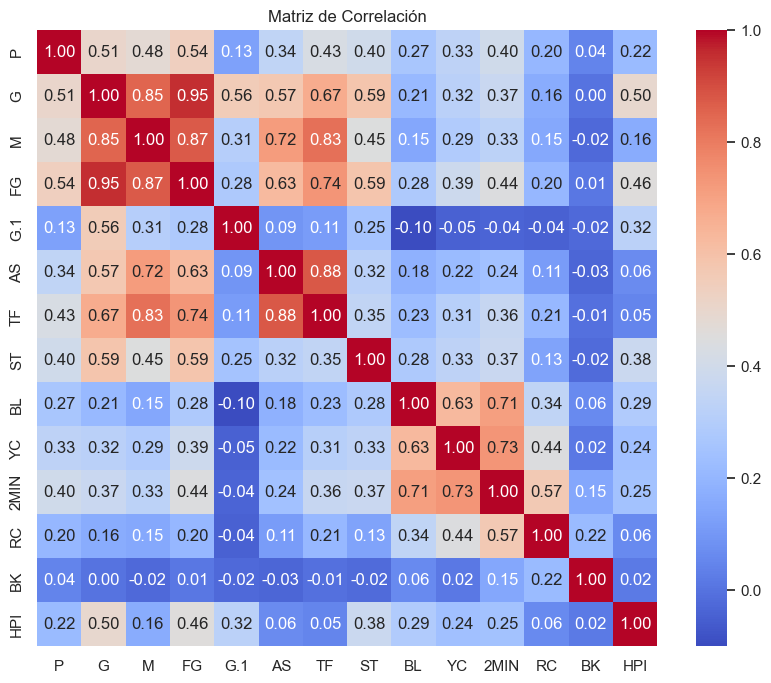

In [111]:
# Seleccionar solo las columnas numéricas
numerical_hs = hs.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numerical_hs.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()



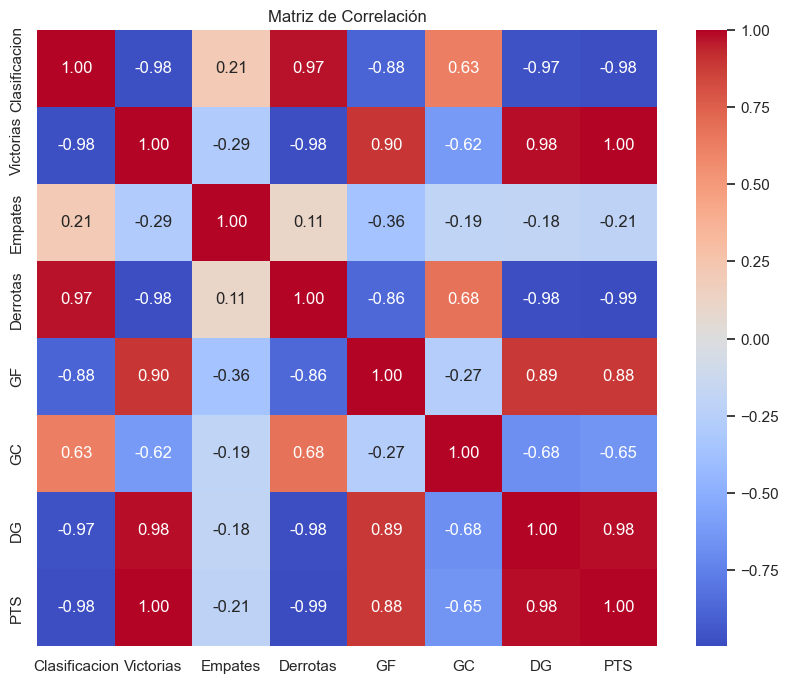

In [112]:
# Seleccionar solo las columnas numéricas
numerical_lb = lb.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix_lb = numerical_lb.drop(columns=["Partidos"]).corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_lb, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()


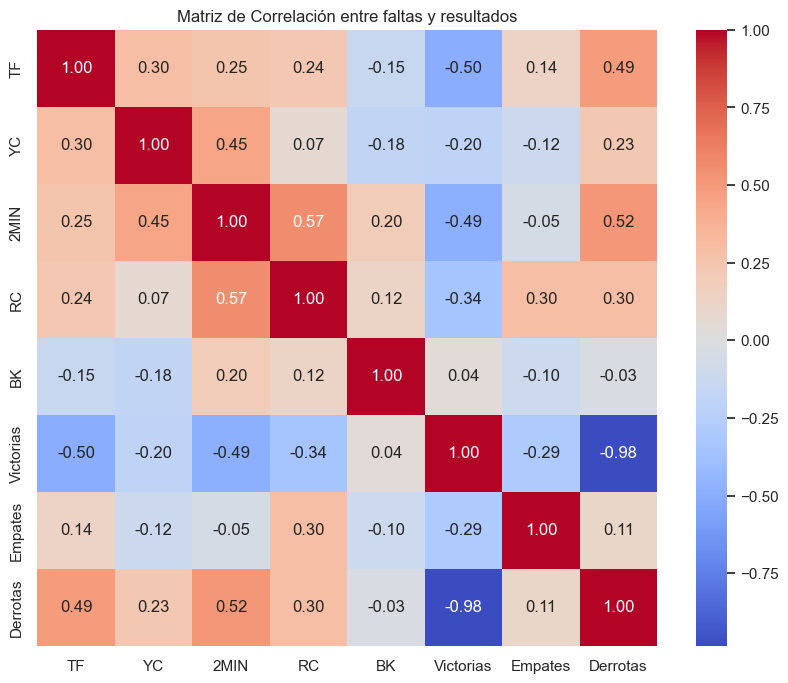

In [113]:
# Asegúrate de que las columnas de los DataFrames coincidan antes de hacer el merge
# Renombrar la columna 'Equipo' en lb a 'CLUB' para coincidir con el DataFrame hs
lb = lb.rename(columns={'Equipo': 'CLUB'})

# Agrupar las faltas por equipo en hs y calcular la suma
faltas_por_equipo = hs.groupby('CLUB')[['TF','YC', '2MIN', 'RC', 'BK']].sum()

# Unir la tabla de faltas con la tabla de victorias (lb) usando el nombre 'CLUB' común
Fouls_table = faltas_por_equipo.merge(lb[['CLUB', 'Victorias', 'Empates', 'Derrotas']], on='CLUB', how='left')

# Seleccionar solo las columnas numéricas
numerical_fouls = Fouls_table.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix_fouls = numerical_fouls.corr()

# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_fouls, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre faltas y resultados')
plt.show()

In [114]:
hs['POSITION'].value_counts()

LB    65
PV    62
CB    56
GK    50
RW    48
LW    46
RB    45
Name: POSITION, dtype: int64

In [115]:
lb

,Clasificacion,CLUB,Partidos,Victorias,Empates,Derrotas,GF,GC,DG,PTS
0,1,THW Kiel,34,29,1,4,1098,917,181,59
1,2,SC Magdeburg,34,27,3,4,1124,982,142,57
2,3,Füchse Berlin,34,25,1,8,1103,990,113,51
3,4,SG Flensburg-Handewitt,34,23,3,8,1062,929,133,49
4,5,Rhein-Neckar Löwen,34,22,1,11,1133,1025,108,45
5,6,TSV Hannover-Burgdorf,34,18,2,14,994,978,16,38
6,7,Handball Sportverein Hamburg,34,17,2,15,1028,1010,18,36
7,8,TBV Lemgo Lippe,34,16,3,15,1013,1010,3,35
8,9,MT Melsungen,34,14,6,14,910,923,-13,34
9,10,VfL Gummersbach,34,15,3,16,1036,1038,-2,33


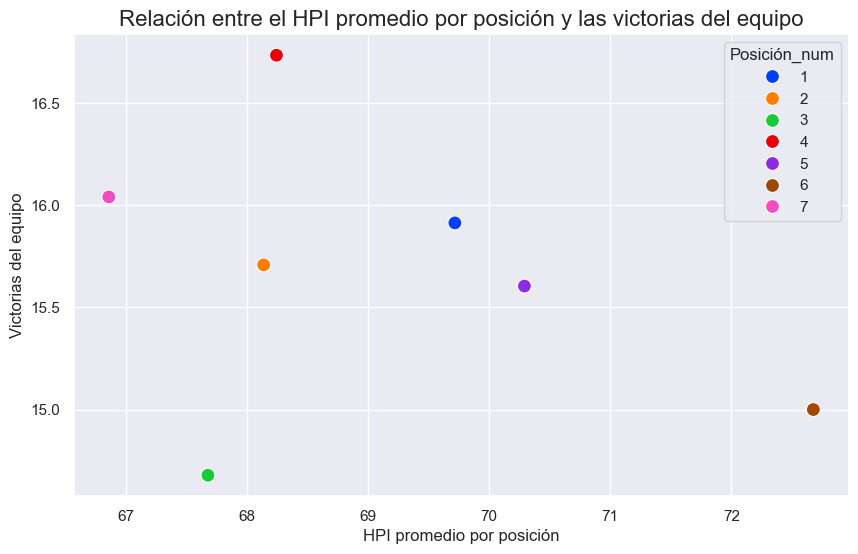

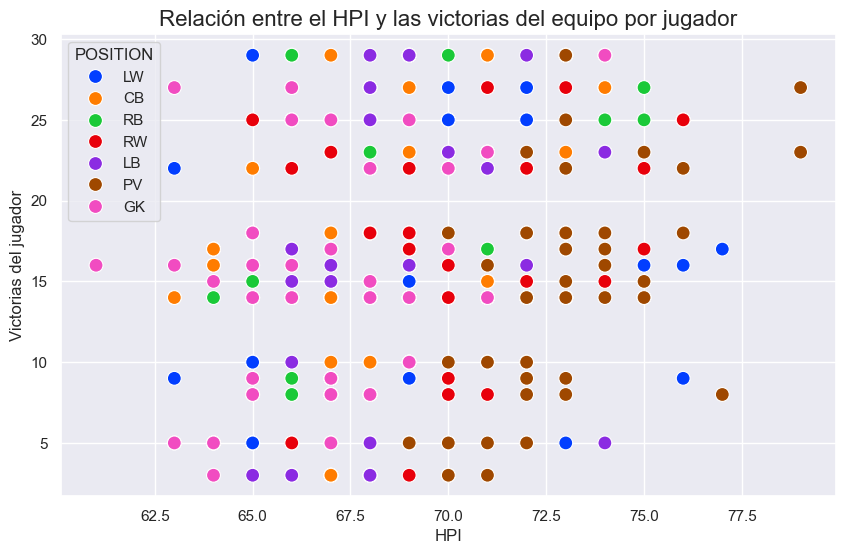

                HPI  Victorias
HPI        1.000000   0.261608
Victorias  0.261608   1.000000


In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar jugadores con HPI alto (HPI > 70)
hs_con_victorias = hs.merge(lb[['CLUB', 'Victorias']], on='CLUB', how='left')
posiciones_map = {
    'LW': 1,  # Left Wing
    'LB': 2,  # Left Back
    'CB': 3,  # Center Back
    'RB': 4,  # Right Back
    'RW': 5,  # Right Wing
    'PV': 6,  # Pivot
    'GK': 7   # Goalkeeper
}

# Añadir una columna numérica para la posición
hs_con_victorias['Posición_num'] = hs_con_victorias['POSITION'].map(posiciones_map)

promedio_hpi_por_posicion = hs_con_victorias.groupby('Posición_num').agg({'HPI': 'mean'}).reset_index()
victorias_por_posicion = hs_con_victorias.groupby('Posición_num').agg({'Victorias': 'mean'}).reset_index()

# Unir los datos de victorias y HPI promedio por posición
relacion_posicion_victorias = pd.merge(promedio_hpi_por_posicion, victorias_por_posicion,
                                       on='Posición_num', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=relacion_posicion_victorias, x='HPI', y='Victorias', hue='Posición_num', palette='bright', s=100)
plt.title('Relación entre el HPI promedio por posición y las victorias del equipo', fontsize=16)
plt.xlabel('HPI promedio por posición')
plt.ylabel('Victorias del equipo')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=hs_con_victorias, x='HPI', y='Victorias', hue='POSITION', palette='bright', s=100)
plt.title('Relación entre el HPI y las victorias del equipo por jugador', fontsize=16)
plt.xlabel('HPI')
plt.ylabel('Victorias del jugador')
plt.show()

# También podemos calcular la correlación global entre HPI y victorias
correlacion_global = hs_con_victorias[['HPI', 'Victorias']].corr()
print(correlacion_global)


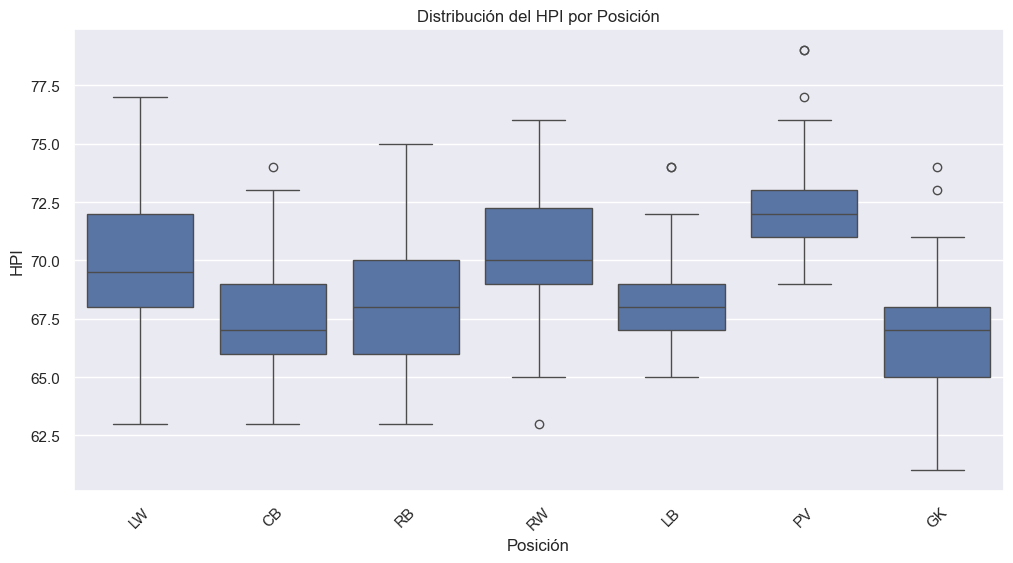

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 6))
plt.title("Distribución del HPI por Posición")

# Crear un boxplot para cada posición
sns.boxplot(data=hs, x="POSITION", y="HPI")
plt.xlabel("Posición")
plt.ylabel("HPI")
plt.xticks(rotation=45)
plt.show()

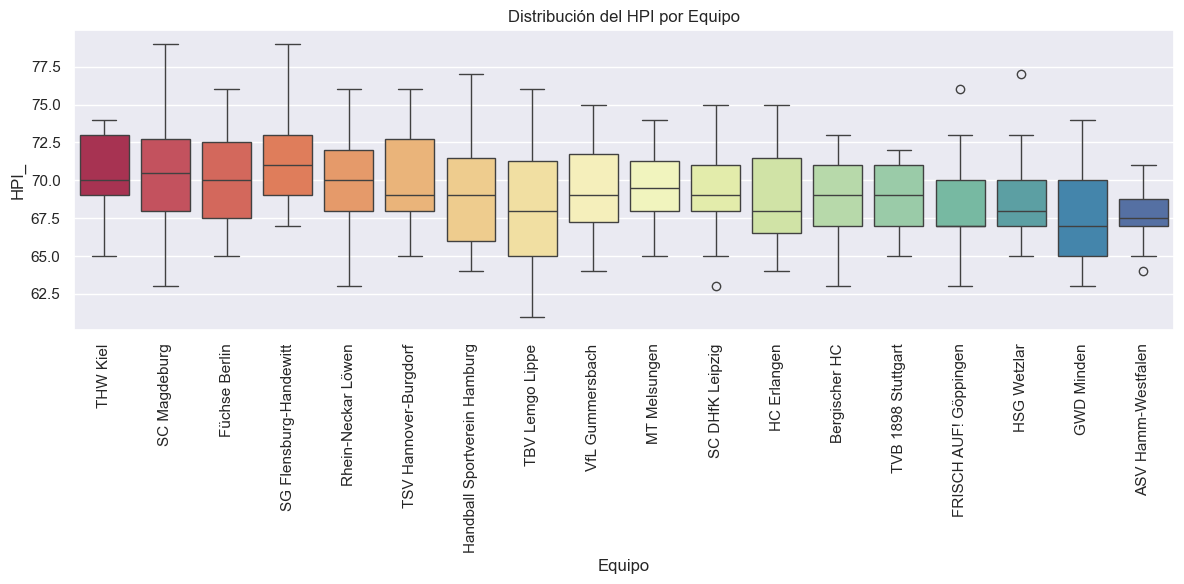

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns
# Obtener el orden de los equipos según la clasificación en la tabla 'lb'
ordered_teams = lb.sort_values('Victorias', ascending=False)['CLUB'].tolist()

# Configuración del tamaño de la figura
plt.figure(figsize=(12, 6))
plt.title("Distribución del HPI por Equipo")

# Crear un boxplot para cada equipo, usando el orden de los equipos de las vicotrias de la temporada
sns.boxplot(data=hs, x="CLUB", y="HPI", palette="Spectral", order=ordered_teams)

# Etiquetas y ajustes del gráfico
plt.xlabel("Equipo")
plt.ylabel("HPI_")
plt.xticks(rotation=90)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



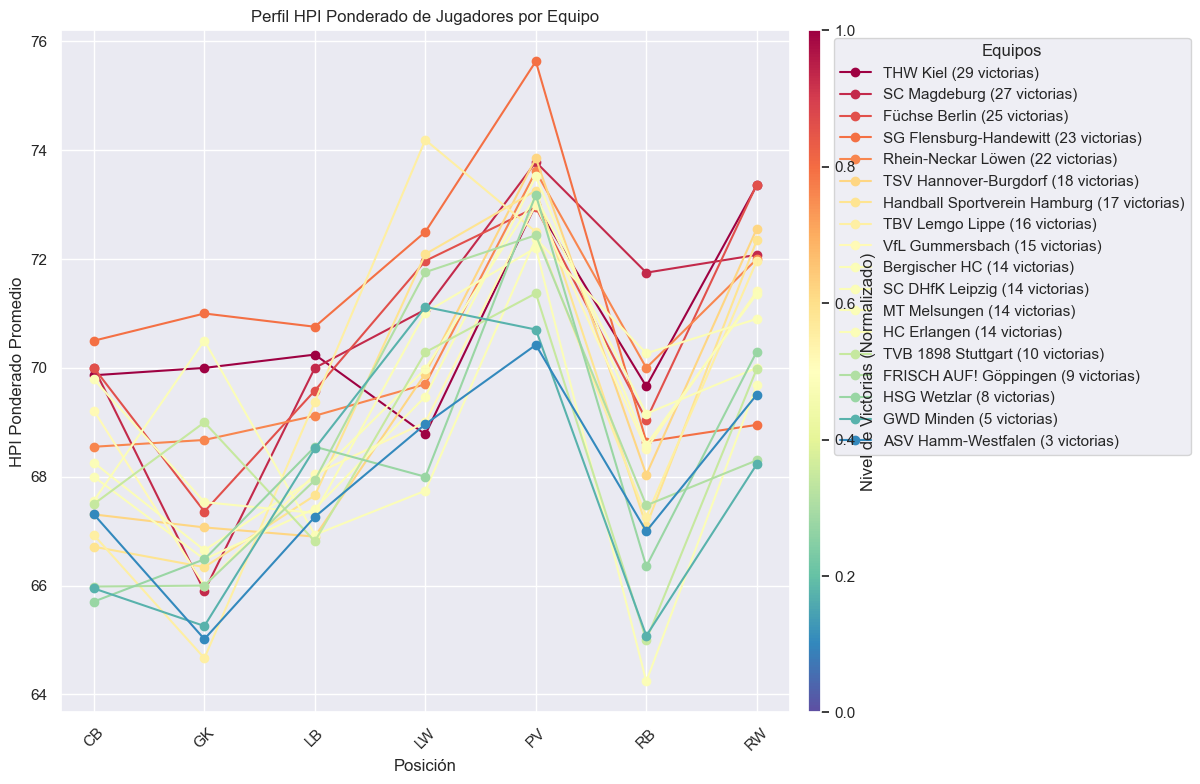

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular el peso relativo de partidos jugados
hs["Peso"] = hs["P"] / 34  # Donde 34 es el total de partidos de la liga
hs["HPI_ponderado"] = hs["HPI"] * hs["Peso"]

# Agrupar correctamente para obtener la media ponderada por equipo y posición
weighted_hpi = (
    hs.groupby(["CLUB", "POSITION"])
    .apply(lambda group: group["HPI_ponderado"].sum() / group["Peso"].sum())
    .reset_index(name="HPI_ponderado")
)

# Unir la tabla de victorias con el HPI ponderado
team_victories = lb[['CLUB', 'Victorias']]  # Cambiar 'CLUB' y 'Victorias' si los nombres son distintos
hpi_by_position = pd.merge(weighted_hpi, team_victories, on='CLUB')

# Normalizar las victorias para asignar un color de amarillo a rojo
max_victories = hpi_by_position['Victorias'].max()
hpi_by_position['Color'] = hpi_by_position['Victorias'] / max_victories

# Crear un mapa de colores por equipo
cmap = sns.color_palette("Spectral_r", as_cmap=True)
team_colors = {team: cmap(color) for team, color in zip(hpi_by_position['CLUB'], hpi_by_position['Color'])}

# Ordenar los equipos por el número de victorias, de mayor a menor
sorted_teams = hpi_by_position.groupby("CLUB")["Victorias"].max().sort_values(ascending=False).index.tolist()

# Crear la figura para el gráfico general
plt.figure(figsize=(14, 8))

# Crear el objeto para la barra de colores
norm = plt.Normalize(0, 1)  # Normalizar entre 0 y 1
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # No necesita datos, solo rango de colores

# Para cada equipo, pintar la línea con su color correspondiente
for team in sorted_teams:
    # Filtrar los datos del equipo
    team_data = hpi_by_position[hpi_by_position['CLUB'] == team]
    
    # Crear el gráfico de línea para cada equipo
    plt.plot(team_data['POSITION'], team_data['HPI_ponderado'], marker='o', label=f"{team} ({team_data['Victorias'].iloc[0]} victorias)", 
             color=team_colors[team])  # Asignar color basado en el mapeo

# Personalizar el gráfico
plt.title('Perfil HPI Ponderado de Jugadores por Equipo')
plt.xlabel('Posición')
plt.ylabel('HPI Ponderado Promedio')
plt.xticks(rotation=45)

# Agregar la barra de colores en una posición adecuada
cbar = plt.colorbar(sm, aspect=50, pad=0.02)
cbar.set_label('Nivel de Victorias (Normalizado)')

# Mostrar leyenda en el orden deseado y ajustar diseño
plt.legend(title='Equipos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Mostrar el gráfico
plt.show()


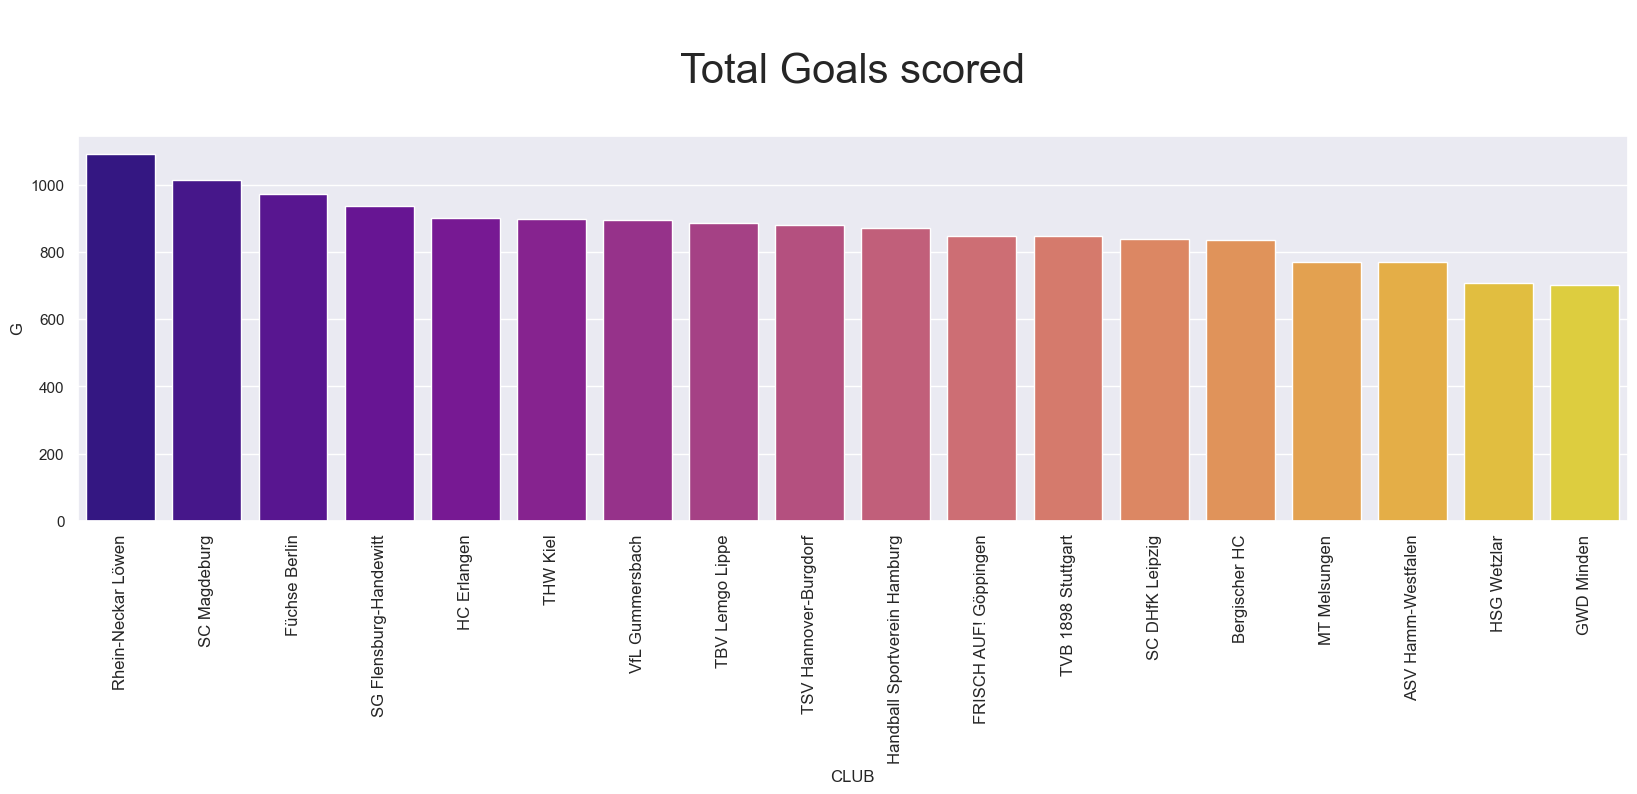

In [120]:
tks=hs.groupby('CLUB',as_index = False)["G"].sum().sort_values(by='G',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12,rotation='vertical')
p=sns.barplot(x="CLUB", y="G", data=tks,palette="plasma",capsize=.2)
p.axes.set_title("\nTotal Goals scored\n",fontsize=30);

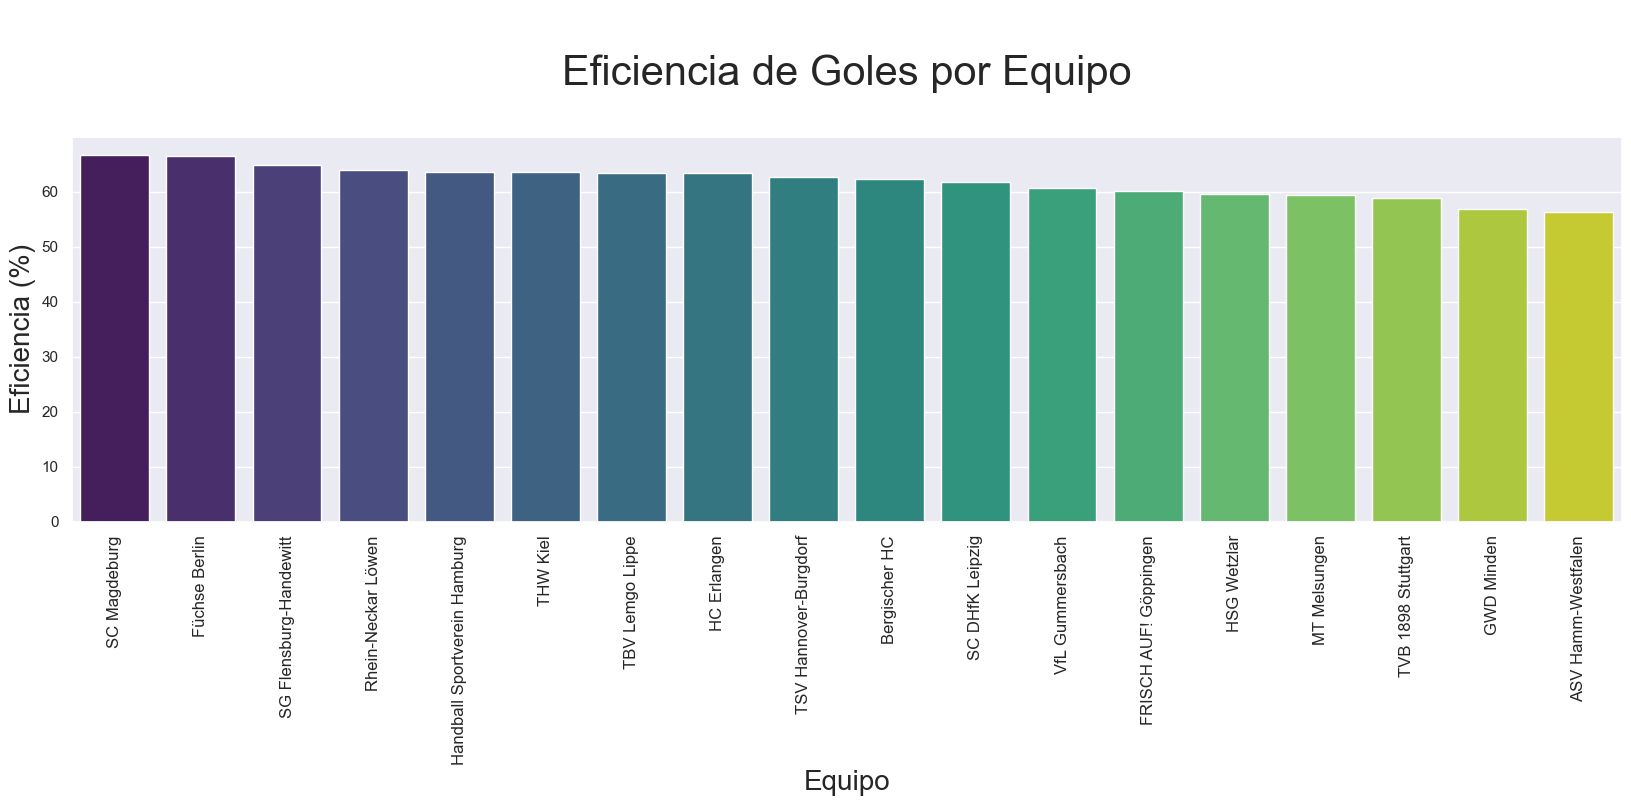

In [121]:
# Convertir el porcentaje de tiro de texto a valor numérico
hs["%"] = pd.to_numeric(hs["%"].replace('%', ''), errors='coerce')

# Calcular la eficiencia para cada equipo
efficiency_by_team = hs.groupby('CLUB').agg({
    'G': 'sum',  # Total de goles
    'M': 'sum',  # Total de tiros fallados
}).reset_index()

# Añadir columna de eficiencia como porcentaje de goles exitosos
efficiency_by_team['Efficiency'] = (efficiency_by_team['G'] / (efficiency_by_team['G'] + efficiency_by_team['M'])) * 100

# Ordenar los equipos por eficiencia
efficiency_by_team = efficiency_by_team.sort_values(by='Efficiency', ascending=False)

 # Crear el gráfico de eficiencia por equipo
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12, rotation='vertical')

# Gráfico de barras con eficiencia
p = sns.barplot(x="CLUB", y="Efficiency", data=efficiency_by_team, palette="viridis", capsize=.2)

# Añadir título y etiquetas
p.set_title("\nEficiencia de Goles por Equipo\n", fontsize=30)
p.set_xlabel("Equipo", fontsize=20)
p.set_ylabel("Eficiencia (%)", fontsize=20)

plt.show()


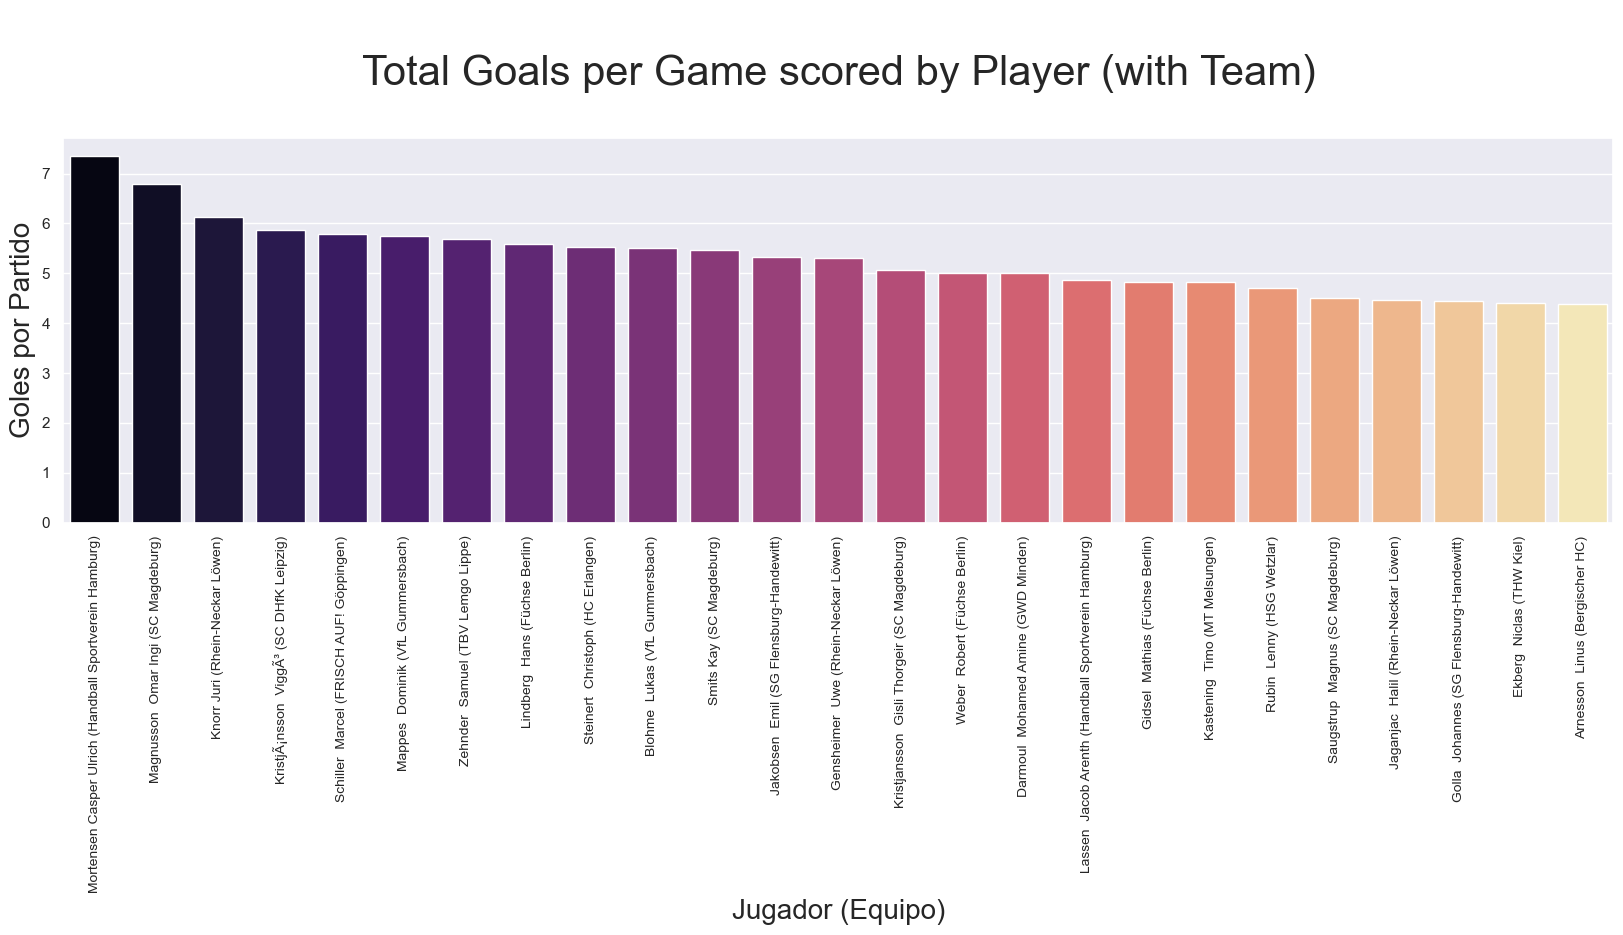

In [122]:
# Crear una nueva columna con el promedio de goles por partido
hs["Goals_per_game"] = hs["G"] / hs["P"]

# Ordenar por goles por partido de mayor a menor
hs_sorted = hs.sort_values(by="Goals_per_game", ascending=False)

# Crear una nueva columna que combine el nombre del jugador y el equipo
hs_sorted["Player_Club"] = hs_sorted["NAME"] + " (" + hs_sorted["CLUB"] + ")"

# Crear el gráfico de los jugadores con más goles por partido
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=10,rotation="vertical")

# Gráfico de barras mostrando los 25 jugadores con mejor promedio de goles por partido
p = sns.barplot(x="Player_Club", y="Goals_per_game", data=hs_sorted[:25], palette="magma", capsize=.2)

# Añadir etiquetas y título
p.set_title("\nTotal Goals per Game scored by Player (with Team)\n", fontsize=30)
p.set_xlabel("Jugador (Equipo)", fontsize=20)
p.set_ylabel("Goles por Partido", fontsize=20)

plt.show()


In [123]:
lb

,Clasificacion,CLUB,Partidos,Victorias,Empates,Derrotas,GF,GC,DG,PTS
0,1,THW Kiel,34,29,1,4,1098,917,181,59
1,2,SC Magdeburg,34,27,3,4,1124,982,142,57
2,3,Füchse Berlin,34,25,1,8,1103,990,113,51
3,4,SG Flensburg-Handewitt,34,23,3,8,1062,929,133,49
4,5,Rhein-Neckar Löwen,34,22,1,11,1133,1025,108,45
5,6,TSV Hannover-Burgdorf,34,18,2,14,994,978,16,38
6,7,Handball Sportverein Hamburg,34,17,2,15,1028,1010,18,36
7,8,TBV Lemgo Lippe,34,16,3,15,1013,1010,3,35
8,9,MT Melsungen,34,14,6,14,910,923,-13,34
9,10,VfL Gummersbach,34,15,3,16,1036,1038,-2,33


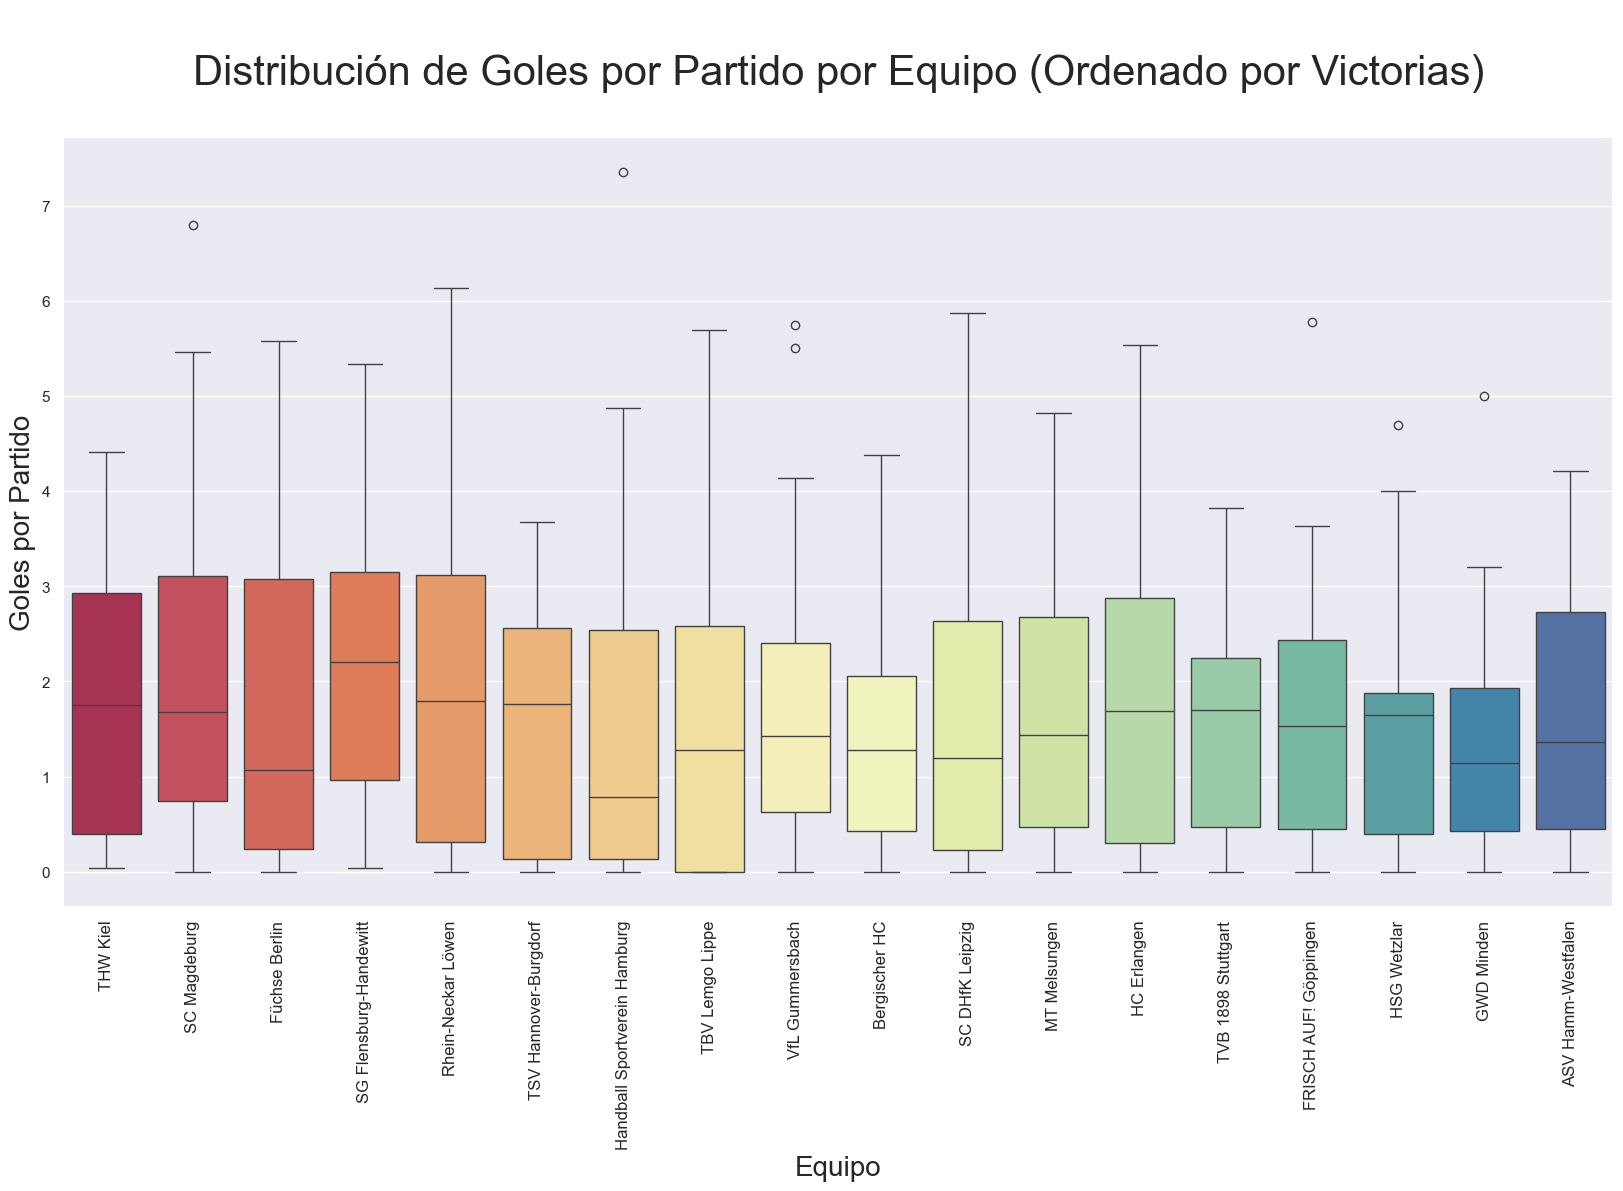

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'hs' es el DataFrame de jugadores y 'lb' el de la clasificación de equipos

# Unir los DataFrames 'hs' y 'lb' por la columna 'CLUB'
merged_df = pd.merge(hs, lb[['CLUB', 'Victorias']], on='CLUB', how='left')

# Obtener el orden de los equipos basado en las victorias
ordered_teams = merged_df.groupby('CLUB')['Victorias'].max().sort_values(ascending=False).index

# Gráfico de caja para ver la distribución de goles por partido por equipo, ordenado por victorias
sns.set(rc={'figure.figsize':(20,10)})
plt.xticks(fontsize=12, rotation=90)

p = sns.boxplot(x="CLUB", y="Goals_per_game", data=merged_df, palette="Spectral", order=ordered_teams)

# Añadir etiquetas y título
p.set_title("\nDistribución de Goles por Partido por Equipo (Ordenado por Victorias)\n", fontsize=30)
p.set_xlabel("Equipo", fontsize=20)
p.set_ylabel("Goles por Partido", fontsize=20)

plt.show()


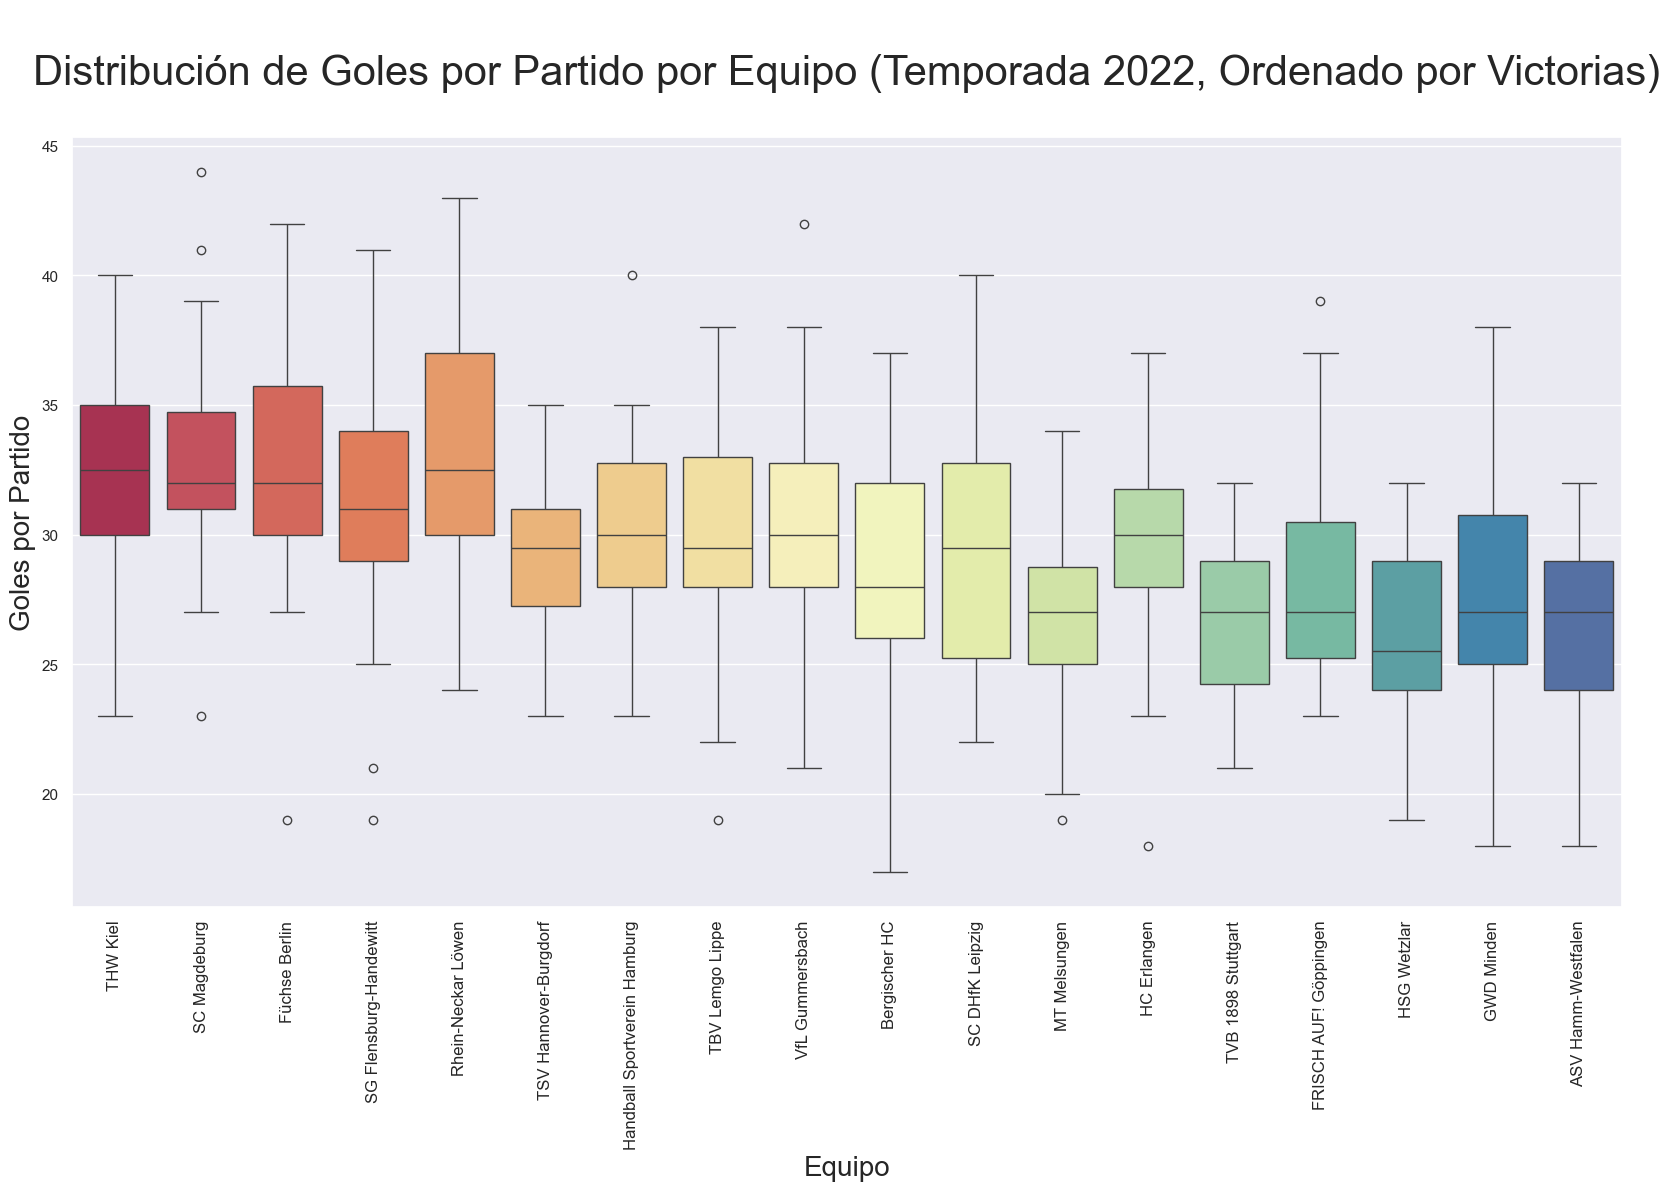

In [126]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filtrar los partidos de la temporada 2022
jornadas_2022 = jornadas[jornadas['Season'] == 2022]

# Preparar los datos de goles por partido
home_goals = jornadas_2022[['Home', 'HG']].rename(columns={'Home': 'Team', 'HG': 'Goals'})
away_goals = jornadas_2022[['Away', 'AG']].rename(columns={'Away': 'Team', 'AG': 'Goals'})

# Unir los datos de goles como local y visitante
all_goals_2022 = pd.concat([home_goals, away_goals])

# Unir con las victorias para ordenar
all_goals_2022 = pd.merge(all_goals_2022, lb[['CLUB', 'Victorias']], left_on='Team', right_on='CLUB', how='left')

# Ordenar los equipos por número de victorias
ordered_teams_2022 = all_goals_2022.groupby('Team')['Victorias'].max().sort_values(ascending=False).index

# Crear el gráfico de caja
sns.set(rc={'figure.figsize': (20, 10)})
plt.xticks(fontsize=12, rotation=90)

p = sns.boxplot(
    x="Team", y="Goals", data=all_goals_2022, palette="Spectral",
    order=ordered_teams_2022
)

# Añadir etiquetas y título
p.set_title("\nDistribución de Goles por Partido por Equipo (Temporada 2022, Ordenado por Victorias)\n", fontsize=30)
p.set_xlabel("Equipo", fontsize=20)
p.set_ylabel("Goles por Partido", fontsize=20)

plt.show()


In [73]:
lb

,Clasificacion,CLUB,Partidos,Victorias,Empates,Derrotas,GF,GC,DG,PTS
0,1,THW Kiel,34,29,1,4,1098,917,181,59
1,2,SC Magdeburg,34,27,3,4,1124,982,142,57
2,3,Füchse Berlin,34,25,1,8,1103,990,113,51
3,4,SG Flensburg-Handewitt,34,23,3,8,1062,929,133,49
4,5,Rhein-Neckar Löwen,34,22,1,11,1133,1025,108,45
5,6,TSV Hannover-Burgdorf,34,18,2,14,994,978,16,38
6,7,Handball Sportverein Hamburg,34,17,2,15,1028,1010,18,36
7,8,TBV Lemgo Lippe,34,16,3,15,1013,1010,3,35
8,9,MT Melsungen,34,14,6,14,910,923,-13,34
9,10,VfL Gummersbach,34,15,3,16,1036,1038,-2,33


In [ ]:
# Calcular el promedio de goles por partido en la tabla de clasificación
lb["Goals_per_game"] = lb["GF"] / lb["Partidos"]

# Ordenar los equipos por promedio de goles por partido
lb_sorted = lb.sort_values(by="Goals_per_game", ascending=False)

# Crear el gráfico de los equipos con más promedio de goles por partido
sns.set(rc={'figure.figsize':(20,5)})
plt.xticks(fontsize=12, rotation='vertical')

# Gráfico de barras con el promedio de goles por partido por equipo
p = sns.barplot(x="CLUB", y="Goals_per_game", data=lb_sorted, palette="plasma", capsize=.2)

# Añadir etiquetas y título
p.set_title("\nPromedio de Goles por Partido por Equipo (Clasificación)\n", fontsize=30)
p.set_xlabel("Equipo", fontsize=20)
p.set_ylabel("Promedio de Goles por Partido", fontsize=20)

plt.show()



In [21]:
# Asegurarse de que las columnas de goles son de tipo numérico
jornadas['HG'] = pd.to_numeric(jornadas['HG'], errors='coerce')
jornadas['AG'] = pd.to_numeric(jornadas['AG'], errors='coerce')


# Definir función para calcular los puntos según el resultado para el Equipo 1
def calcular_puntos_equipo_1(row):
    if row['HG'] > row['AG']:  # Equipo 1 gana
        return 2
    elif row['HG'] == row['AG']:  # Empate
        return 1
    else:  # Equipo 1 pierde
        return 0

# Definir función para calcular los puntos según el resultado para el Equipo 2
def calcular_puntos_equipo_2(row):
    if row['AG'] > row['HG']:  # Equipo 2 gana
        return 2
    elif row['HG'] == row['AG']:  # Empate
        return 1
    else:  # Equipo 2 pierde
        return 0

# Crear las columnas con los puntos del Equipo 1 y Equipo 2
jornadas['Puntos_Equipo_1'] = jornadas.apply(calcular_puntos_equipo_1, axis=1)
jornadas['Puntos_Equipo_2'] = jornadas.apply(calcular_puntos_equipo_2, axis=1)

# Mostrar las primeras filas para verificar
jornadas


,Round,Home,HG,AG,Away,Season,Res,W,L,Puntos_Equipo_1,Puntos_Equipo_2
0,1,HandballSportvereinHamburg,30,31,SGFlensburg-Handewitt,2022,A,31,30,0,2
1,1,TBVLemgoLippe,26,30,VfLGummersbach,2022,A,30,26,0,2
2,1,TSVHannover-Burgdorf,25,22,SCDHfKLeipzig,2022,H,25,22,2,0
3,1,HCErlangen,31,27,HSGWetzlar,2022,H,31,27,2,0
4,1,Rhein-NeckarLöwen,36,25,MTMelsungen,2022,H,36,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,34,THW Kiel,42,35,FRISCH AUF! Göppingen,2021,H,42,35,2,0
914,34,HC Erlangen,33,26,Balingen-Weilstetten,2021,H,33,26,2,0
915,34,Füchse Berlin,22,28,SG Flensburg-Handewitt,2021,A,28,22,0,2
916,34,TSV Hannover-Burgdorf,26,26,SC DHfK Leipzig,2021,D,26,26,1,1


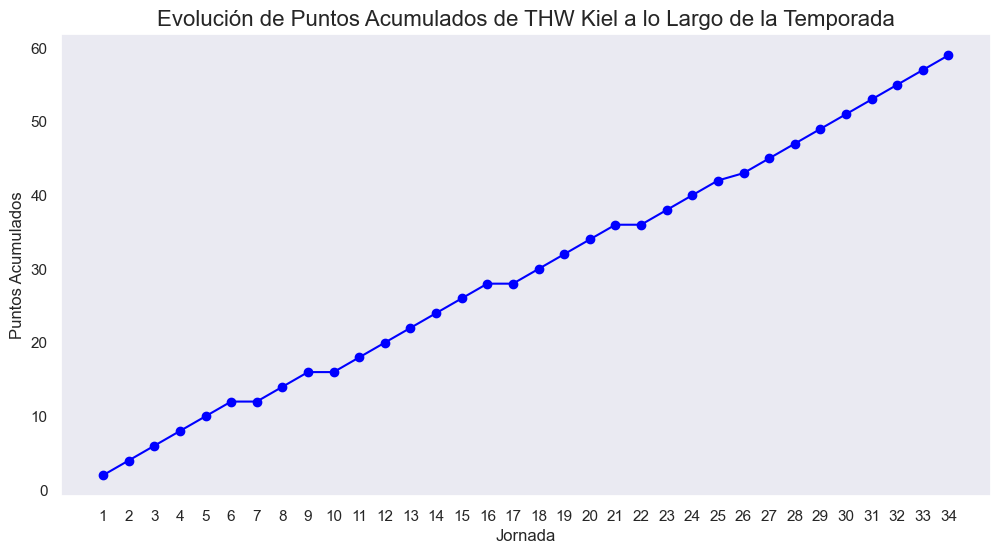

In [22]:
# Filtrar los partidos del THW Kiel
thw_kiel_partidos = jornadas[jornadas['Home'] == 'THWKiel'].copy()

# Agregar los partidos en los que THW Kiel es el Team2
thw_kiel_partidos_2 = jornadas[jornadas['Away'] == 'THWKiel'].copy()

# Cambiar el nombre del equipo para que sea consistente
thw_kiel_partidos_2['Puntos_Equipo_1'] = thw_kiel_partidos_2['Puntos_Equipo_2']
thw_kiel_partidos_2['Puntos_Equipo_2'] = thw_kiel_partidos_2['Puntos_Equipo_1'].replace(0, 2)  # Invertir los puntos para reflejar el resultado

# Combinar ambos DataFrames
thw_kiel_partidos = pd.concat([thw_kiel_partidos, thw_kiel_partidos_2])

# Ordenar por jornada
thw_kiel_partidos.sort_values(by='Round', inplace=True)

# Calcular puntos acumulados
thw_kiel_partidos['Puntos_acumulados'] = thw_kiel_partidos['Puntos_Equipo_1'].cumsum()


# Crear el gráfico de líneas para la evolución de puntos acumulados del THW Kiel
plt.figure(figsize=(12, 6))
plt.plot(thw_kiel_partidos['Round'], thw_kiel_partidos['Puntos_acumulados'], marker='o', color='blue')

# Añadir etiquetas y título
plt.title("Evolución de Puntos Acumulados de THW Kiel a lo Largo de la Temporada", fontsize=16)
plt.xlabel("Jornada", fontsize=12)
plt.ylabel("Puntos Acumulados", fontsize=12)
plt.xticks(thw_kiel_partidos['Round'])  # Mostrar todas las jornadas en el eje x
plt.grid()
plt.show()


In [23]:
# Filtrar las jornadas donde el THW Kiel ha jugado
thw_kiel_jornadas = jornadas[(jornadas['Home'] == 'THWKiel') | (jornadas['Away'] == 'THWKiel')]

# Crear una nueva columna para almacenar el número de goles marcados por el THW Kiel
thw_kiel_jornadas['Goles_Marcados'] = thw_kiel_jornadas.apply(
    lambda row: row['HG'] if row['Home'] == 'THWKiel' else row['AG'], axis=1
)

# Crear una nueva columna para el equipo contrario
thw_kiel_jornadas['Equipo_Contrario'] = thw_kiel_jornadas.apply(
    lambda row: row['Away'] if row['Home'] == 'THWKiel' else row['Home'], axis=1
)

# Agrupar por el equipo contrario y sumar los goles
goles_por_equipo = thw_kiel_jornadas.groupby('Equipo_Contrario')['Goles_Marcados'].sum().reset_index()

# Renombrar las columnas para mayor claridad
goles_por_equipo.columns = ['Equipo_Contrario', 'Total_Goles']

# Ordenar los resultados de mayor a menor
goles_por_equipo = goles_por_equipo.sort_values(by='Total_Goles', ascending=False)

# Mostrar el resultado
print(goles_por_equipo)


              Equipo_Contrario  Total_Goles
0            ASVHamm-Westfalen           77
7   HandballSportvereinHamburg           74
15            TVB1898Stuttgart           73
4                    GWDMinden           70
5                   HCErlangen           69
6                   HSGWetzlar           69
11                 SCMagdeburg           68
2          FRISCHAUF!Göppingen           64
1                 BergischerHC           64
9            Rhein-NeckarLöwen           63
10               SCDHfKLeipzig           63
14        TSVHannover-Burgdorf           62
3                 FüchseBerlin           62
16              VfLGummersbach           61
13               TBVLemgoLippe           60
12       SGFlensburg-Handewitt           52
8                  MTMelsungen           47


# Model per Predir el Resultat d'un Partit d'Handbol basat en el Número de Gols Anotats per un Únic Equip

### Exploració de les Dades

In [79]:
jornadas

,Round,Home,HG,AG,Away,Season,Res,W,L,Puntos_Equipo_1,Puntos_Equipo_2
0,1,HandballSportvereinHamburg,30,31,SGFlensburg-Handewitt,2022,A,31,30,0,2
1,1,TBVLemgoLippe,26,30,VfLGummersbach,2022,A,30,26,0,2
2,1,TSVHannover-Burgdorf,25,22,SCDHfKLeipzig,2022,H,25,22,2,0
3,1,HCErlangen,31,27,HSGWetzlar,2022,H,31,27,2,0
4,1,Rhein-NeckarLöwen,36,25,MTMelsungen,2022,H,36,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...
913,34,THW Kiel,42,35,FRISCH AUF! Göppingen,2021,H,42,35,2,0
914,34,HC Erlangen,33,26,Balingen-Weilstetten,2021,H,33,26,2,0
915,34,Füchse Berlin,22,28,SG Flensburg-Handewitt,2021,A,28,22,0,2
916,34,TSV Hannover-Burgdorf,26,26,SC DHfK Leipzig,2021,D,26,26,1,1


In [80]:
total_victorias = jornadas['Res'].value_counts().get('H', 0) + jornadas['Res'].value_counts().get('A', 0)
total_empates = jornadas['Res'].value_counts().get('D', 0)
total_partidos = len(jornadas)

totales = pd.DataFrame({
    'Total Empates': [total_empates],
    'Total Victorias': [total_victorias],
    'Total Partidos': [total_partidos]
})

print(totales.to_string(index=False))

 Total Empates  Total Victorias  Total Partidos
            79              839             918


In [81]:
# Inicializar un diccionario para almacenar los resultados por goles
resultados = {}

# Contar resultados para cada cantidad de goles anotados
for index, row in jornadas.iterrows():
    home_goals = row['HG']
    away_goals = row['AG']
    resultado = row['Res']

    # Para el equipo local
    if home_goals not in resultados:
        resultados[home_goals] = {'W': 0, 'L': 0, 'D': 0}
    
    if resultado == 'H':
        resultados[home_goals]['W'] += 1
    elif resultado == 'A':
        resultados[home_goals]['L'] += 1
    else:  # 'D'
        resultados[home_goals]['D'] += 1

    # Para el equipo visitante
    if away_goals not in resultados:
        resultados[away_goals] = {'W': 0, 'L': 0, 'D': 0}
    
    if resultado == 'A':
        resultados[away_goals]['W'] += 1
    elif resultado == 'H':
        resultados[away_goals]['L'] += 1
    else:  # 'D'
        resultados[away_goals]['D'] += 1

# Convertir el diccionario a un DataFrame
resultados_df= pd.DataFrame.from_dict(resultados, orient='index').reset_index()
resultados_df.columns = ['Goals', 'W', 'L', 'D']

# Mostrar la tabla de resultados
print(resultados_df.sort_values(by='Goals').to_string(index=False))


 Goals  W   L  D
    15  1   1  0
    16  0   3  0
    17  0   6  0
    18  0   8  0
    19  0  14  0
    20  2  15  0
    21  5  27  2
    22  3  50  6
    23 11  64 10
    24 13  63  2
    25 20  89 14
    26 38  87 20
    27 52 100 20
    28 69  88 16
    29 69  68 12
    30 78  55  6
    31 90  41 22
    32 85  26 10
    33 68  13  6
    34 72  12  8
    35 45   4  0
    36 25   2  2
    37 39   3  0
    38 17   0  2
    39 10   0  0
    40 12   0  0
    41  5   0  0
    42  5   0  0
    43  3   0  0
    44  2   0  0


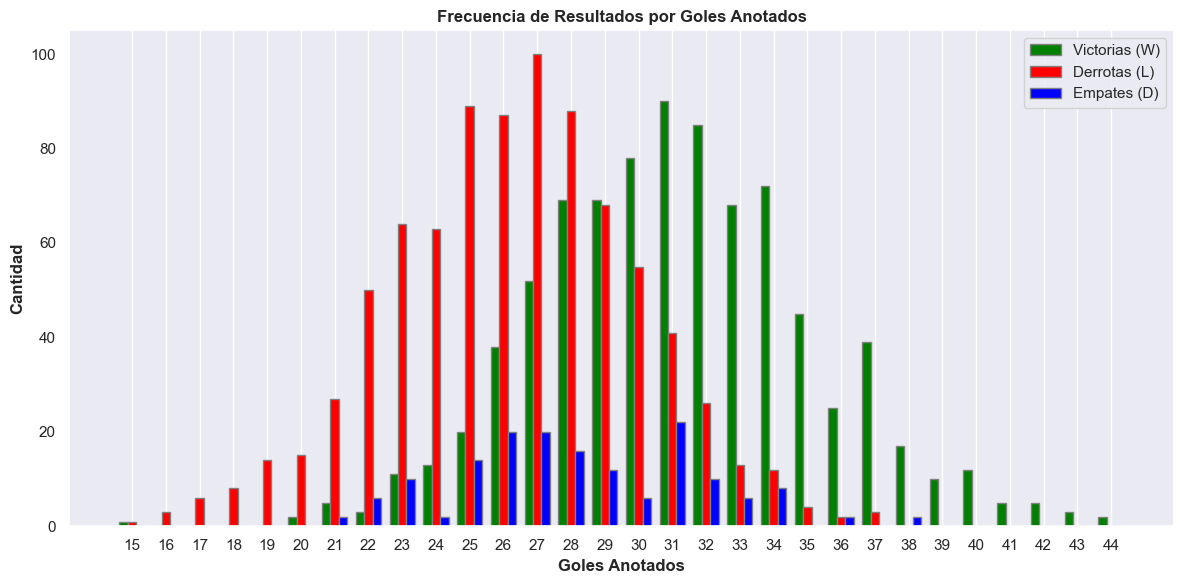

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Inicializar un diccionario para contar la frecuencia de goles
frecuencia_goles = {}

# Contar resultados para cada cantidad de goles anotados
for index, row in jornadas.iterrows():
    home_goals = row['HG']
    away_goals = row['AG']
    resultado = row['Res']

    # Contar para el equipo local
    if home_goals not in frecuencia_goles:
        frecuencia_goles[home_goals] = {'W': 0, 'L': 0, 'D': 0}
    
    if resultado == 'H':
        frecuencia_goles[home_goals]['W'] += 1
    elif resultado == 'A':
        frecuencia_goles[home_goals]['L'] += 1
    else:  # 'D'
        frecuencia_goles[home_goals]['D'] += 1

    # Contar para el equipo visitante
    if away_goals not in frecuencia_goles:
        frecuencia_goles[away_goals] = {'W': 0, 'L': 0, 'D': 0}
    
    if resultado == 'A':
        frecuencia_goles[away_goals]['W'] += 1
    elif resultado == 'H':
        frecuencia_goles[away_goals]['L'] += 1
    else:  # 'D'
        frecuencia_goles[away_goals]['D'] += 1

# Convertir el diccionario a un DataFrame
frecuencia_goles_df = pd.DataFrame.from_dict(frecuencia_goles, orient='index').reset_index()
frecuencia_goles_df.columns = ['Goals', 'W', 'L', 'D']

# Convertir la columna de goles a tipo numérico para poder ordenar
frecuencia_goles_df['Goals'] = pd.to_numeric(frecuencia_goles_df['Goals'])

# Ordenar el DataFrame por goles de manera ascendente
frecuencia_goles_df = frecuencia_goles_df.sort_values(by='Goals')

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))

# Establecer el ancho de las barras
bar_width = 0.25

# Posicionar las barras
r1 = range(len(frecuencia_goles_df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Crear las barras
ax.bar(r1, frecuencia_goles_df['W'], color='green', width=bar_width, edgecolor='grey', label='Victorias (W)')
ax.bar(r2, frecuencia_goles_df['L'], color='red', width=bar_width, edgecolor='grey', label='Derrotas (L)')
ax.bar(r3, frecuencia_goles_df['D'], color='blue', width=bar_width, edgecolor='grey', label='Empates (D)')

# Añadir etiquetas y título
ax.set_xlabel('Goles Anotados', fontweight='bold')
ax.set_ylabel('Cantidad', fontweight='bold')
ax.set_title('Frecuencia de Resultados por Goles Anotados', fontweight='bold')
ax.set_xticks([r + bar_width for r in range(len(frecuencia_goles_df))])
ax.set_xticklabels(frecuencia_goles_df['Goals'])
ax.legend()

# Mostrar la cuadrícula
ax.grid(axis='y')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


In [83]:
jornadas_sin_empates = jornadas[jornadas['Res'] != 'D']
jornadas_sin_empates

,Round,Home,HG,AG,Away,Season,Res,W,L,Puntos_Equipo_1,Puntos_Equipo_2
0,1,HandballSportvereinHamburg,30,31,SGFlensburg-Handewitt,2022,A,31,30,0,2
1,1,TBVLemgoLippe,26,30,VfLGummersbach,2022,A,30,26,0,2
2,1,TSVHannover-Burgdorf,25,22,SCDHfKLeipzig,2022,H,25,22,2,0
3,1,HCErlangen,31,27,HSGWetzlar,2022,H,31,27,2,0
4,1,Rhein-NeckarLöwen,36,25,MTMelsungen,2022,H,36,25,2,0
...,...,...,...,...,...,...,...,...,...,...,...
912,34,TBV Lemgo Lippe,28,24,HSV Hamburg,2021,H,28,24,2,0
913,34,THW Kiel,42,35,FRISCH AUF! Göppingen,2021,H,42,35,2,0
914,34,HC Erlangen,33,26,Balingen-Weilstetten,2021,H,33,26,2,0
915,34,Füchse Berlin,22,28,SG Flensburg-Handewitt,2021,A,28,22,0,2


### Extracció de Característiques

El vector X se forma concatenando las columnas W y L.

En la primera versión, se tomará la derrota y el empate como iguales, ya que buscamos la victoria.

En la segunda versión, eliminaremos los empates del dataset, para trabajar solo con victorias y derrotas.

In [84]:
X = pd.concat([jornadas['W'], jornadas['L']], ignore_index=True)
features_X = X.to_numpy().reshape(-1, 1)
print(len(features_X))

1836


El vector Y se forma cambiadndo H por 1 y A y D por 0

In [85]:
labels_Y = np.array([1]*918 + [0]*918)
print(len(labels_Y))

1836


## Entrenament

In [86]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_X, labels_Y, test_size=0.2, random_state=42)

#### Logistic Regression

In [88]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7744565217391305

#### SVM

In [89]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.7663043478260869

#### Random Forest

In [90]:
rf = RandomForestClassifier(n_estimators = 40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.717391304347826

### KFold Cross Validation

In [91]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [92]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(features_X,labels_Y):
    X_train, X_test, y_train, y_test = features_X[train_index], features_X[test_index], \
                                       labels_Y[train_index], labels_Y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svm.append(get_score(SVC(gamma='auto'), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [93]:
print(scores_logistic)
print(sum(scores_logistic) / len(scores_logistic))
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

[0.7581521739130435, 0.6893732970027248, 0.6893732970027248, 0.7384196185286104, 0.7275204359673024]
0.7205677644828812


NameError: name 'classification_report' is not defined

In [ ]:
print(scores_svm)
print(sum(scores_svm) / len(scores_svm))


In [ ]:
print(scores_rf)
print(sum(scores_rf) / len(scores_rf))

## Matriu de confusió

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar StratifiedKFold y listas para almacenar resultados
folds = StratifiedKFold(n_splits=5)
confusion_matrixs = []  # Lista para almacenar la matriz de confusión de cada fold
classification_reports = []  # Lista para almacenar los reportes de clasificación

# Inicializar la matriz de confusión global con ceros
global_confusion_matrix = None

for train_index, test_index in folds.split(features_X, labels_Y):
    # Dividir los datos en conjunto de entrenamiento y prueba para este fold
    X_train, X_test = features_X[train_index], features_X[test_index]
    y_train, y_test = labels_Y[train_index], labels_Y[test_index]
    
    # Entrenar el modelo de Regresión Logística
    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(X_train, y_train)
    
    # Predecir las etiquetas para los datos de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión para este fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrixs.append(cm)
    
    # Sumar la matriz de confusión actual a la global
    if global_confusion_matrix is None:
        global_confusion_matrix = cm
    else:
        global_confusion_matrix += cm
    
    # Generar y almacenar el reporte de clasificación para este fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)

# Mostrar el reporte de clasificación promedio
average_report = {}
for key in classification_reports[0].keys():
    if isinstance(classification_reports[0][key], dict):
        average_report[key] = {sub_key: np.mean([report[key][sub_key] for report in classification_reports]) 
                               for sub_key in classification_reports[0][key].keys()}
    else:
        average_report[key] = np.mean([report[key] for report in classification_reports])

print("Reporte de Clasificación Promedio:")
print(classification_report(labels_Y, LogisticRegression(solver='liblinear', multi_class='ovr').fit(features_X, labels_Y).predict(features_X)))

# Graficar la matriz de confusión global
plt.figure(figsize=(8, 6))
sns.heatmap(global_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["Derrota", "Victoria"], yticklabels=["Derrota", "Victoria"])
plt.title("Matriz de confusión global del modelo de Regresión Logística")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar StratifiedKFold y listas para almacenar resultados
folds = StratifiedKFold(n_splits=5)
confusion_matrixs = []  # Lista para almacenar la matriz de confusión de cada fold
classification_reports = []  # Lista para almacenar los reportes de clasificación
accuracies = []  # Lista para almacenar la precisión de cada fold

# Inicializar la matriz de confusión global con ceros
global_confusion_matrix = None

for train_index, test_index in folds.split(features_X, labels_Y):
    # Dividir los datos en conjunto de entrenamiento y prueba para este fold
    X_train, X_test = features_X[train_index], features_X[test_index]
    y_train, y_test = labels_Y[train_index], labels_Y[test_index]
    
    # Entrenar el modelo de Regresión Logística
    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(X_train, y_train)
    
    # Predecir las etiquetas para los datos de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión para este fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrixs.append(cm)
    
    # Sumar la matriz de confusión actual a la global
    if global_confusion_matrix is None:
        global_confusion_matrix = cm
    else:
        global_confusion_matrix += cm
    
    # Generar y almacenar el reporte de clasificación para este fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    
    # Calcular y almacenar la precisión para este fold
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Calcular métricas promedio
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# Calcular TPR y TNR a partir de la matriz de confusión global
TP = global_confusion_matrix[1, 1]
FN = global_confusion_matrix[1, 0]
FP = global_confusion_matrix[0, 1]
TN = global_confusion_matrix[0, 0]

TPR = TP / (TP + FN)  # Sensibilidad
TNR = TN / (TN + FP)  # Especificidad

# Calcular F1-score y support promedio del reporte de clasificación
average_f1_score = np.mean([report['weighted avg']['f1-score'] for report in classification_reports])
average_support = np.mean([report['weighted avg']['support'] for report in classification_reports])

# Imprimir las métricas calculadas
print("Métricas del modelo de Regresión Logística:")
print(f"Precisión promedio (Accuracy): {average_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_dev_accuracy:.4f}")
print(f"TPR (Sensibilidad): {TPR:.4f}")
print(f"TNR (Especificidad): {TNR:.4f}")
print(f"F1-score promedio: {average_f1_score:.4f}")
print(f"Support promedio: {average_support:.2f}")

# Graficar la matriz de confusión global
plt.figure(figsize=(8, 6))
sns.heatmap(global_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["Derrota", "Victoria"], yticklabels=["Derrota", "Victoria"])
plt.title("Matriz de confusión global del modelo de Regresión Logística")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


Métricas del modelo de Regresión Logística:
Precisión promedio (Accuracy): 0.7206
Desviación estándar de la precisión: 0.0273
Sensibilidad (TPR): 0.7200
Especificidad (TNR): 0.7211
F1-score promedio: 0.7180


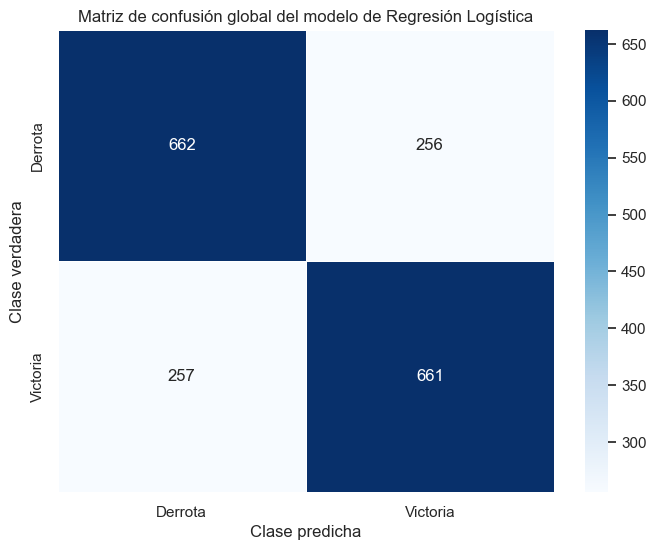

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Inicializar StratifiedKFold y listas para almacenar resultados
folds = StratifiedKFold(n_splits=5)
confusion_matrixs = []  # Lista para almacenar la matriz de confusión de cada fold
classification_reports = []  # Lista para almacenar los reportes de clasificación
accuracies = []  # Lista para almacenar la precisión de cada fold

# Inicializar la matriz de confusión global con ceros
global_confusion_matrix = None

for train_index, test_index in folds.split(features_X, labels_Y):
    # Dividir los datos en conjunto de entrenamiento y prueba para este fold
    X_train, X_test = features_X[train_index], features_X[test_index]
    y_train, y_test = labels_Y[train_index], labels_Y[test_index]
    
    # Entrenar el modelo de Regresión Logística
    model = LogisticRegression(solver='liblinear', multi_class='ovr')
    model.fit(X_train, y_train)
    
    # Predecir las etiquetas para los datos de prueba
    y_pred = model.predict(X_test)
    
    # Calcular la matriz de confusión para este fold
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrixs.append(cm)
    
    # Sumar la matriz de confusión actual a la global
    if global_confusion_matrix is None:
        global_confusion_matrix = cm
    else:
        global_confusion_matrix += cm
    
    # Generar y almacenar el reporte de clasificación para este fold
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports.append(report)
    
    # Calcular y almacenar la precisión para este fold
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Calcular métricas promedio
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

# Calcular TPR y TNR a partir de la matriz de confusión global
TP = global_confusion_matrix[1, 1]
FN = global_confusion_matrix[1, 0]
FP = global_confusion_matrix[0, 1]
TN = global_confusion_matrix[0, 0]

TPR = TP / (TP + FN)  # Sensibilidad (Recall)
TNR = TN / (TN + FP)  # Especificidad

# Calcular F1-score promedio del reporte de clasificación
average_f1_score = np.mean([report['weighted avg']['f1-score'] for report in classification_reports])

# Imprimir las métricas calculadas
print("Métricas del modelo de Regresión Logística:")
print(f"Precisión promedio (Accuracy): {average_accuracy:.4f}")
print(f"Desviación estándar de la precisión: {std_dev_accuracy:.4f}")
print(f"Sensibilidad (TPR): {TPR:.4f}")
print(f"Especificidad (TNR): {TNR:.4f}")
print(f"F1-score promedio: {average_f1_score:.4f}")

# Graficar la matriz de confusión global
plt.figure(figsize=(8, 6))
sns.heatmap(global_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["Derrota", "Victoria"], yticklabels=["Derrota", "Victoria"])
plt.title("Matriz de confusión global del modelo de Regresión Logística")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


In [106]:
# Extraer TP (verdaderos positivos) y FP (falsos positivos) de la matriz de confusión
TP = global_confusion_matrix[1, 1]  # Verdaderos positivos (segunda fila, segunda columna)
FP = global_confusion_matrix[0, 1]  # Falsos positivos (primera fila, segunda columna)

# Calcular la precisión
precisio = TP / (TP + FP)

# Mostrar la precisión
print(f'Precisió a partir de la matriu de confusió: {precisio:.2f}')


Precisió a partir de la matriu de confusió: 0.72


In [107]:
from sklearn.model_selection import permutation_test_score
estimator = LogisticRegression()
score, permutation_scores, pvalue = permutation_test_score(estimator, features_X, labels_Y, random_state=0, n_permutations=1000)
print(f"Original Score: {score:.4f}")
print(
    f"Permutation Scores: {permutation_scores.mean():.3f} +/- "
    f"{permutation_scores.std():.4f}"
)
print(f"P-value: {pvalue:.4f}")

Original Score: 0.7135
Permutation Scores: 0.501 +/- 0.0126
P-value: 0.0010


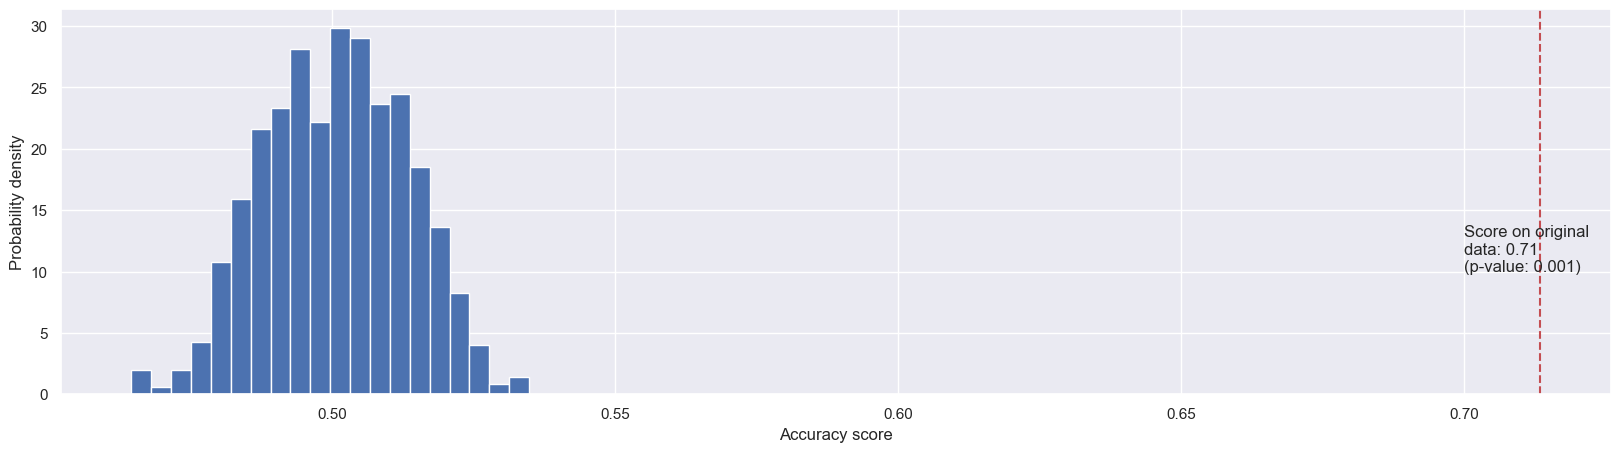

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(permutation_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

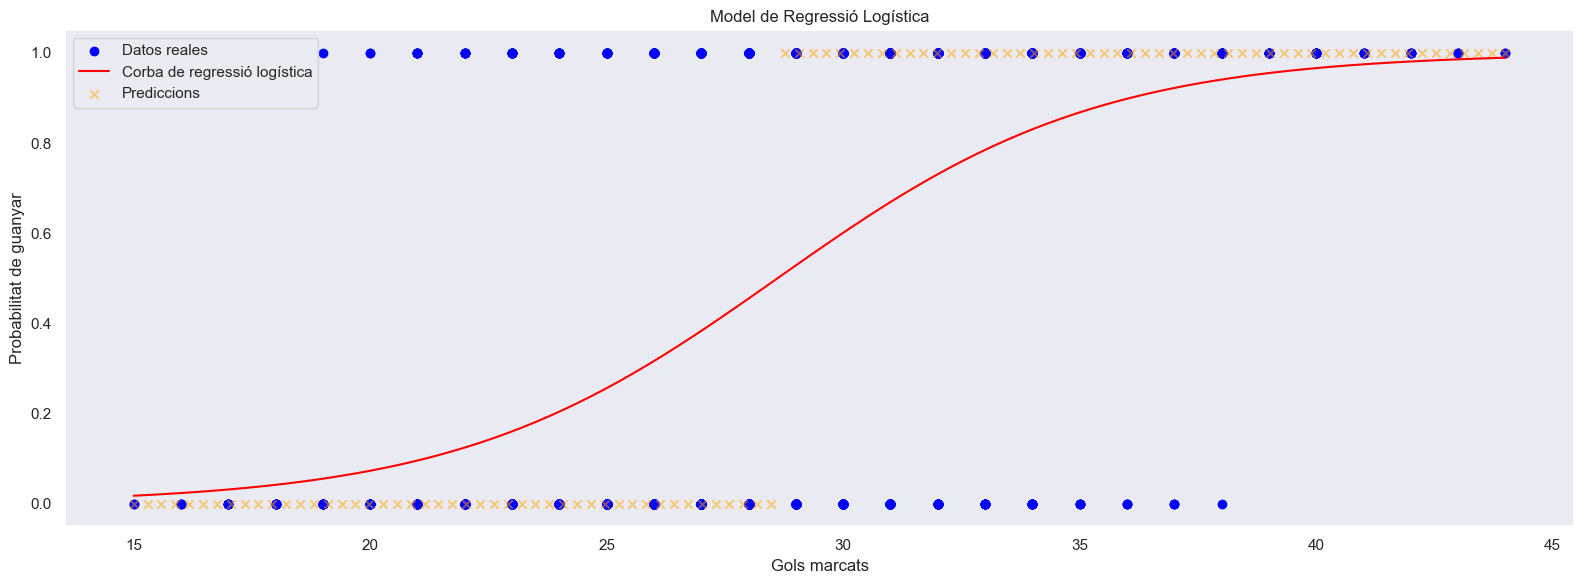

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Generar valores para la curva de ajuste de la regresión logística
X_curve = np.linspace(features_X.min(), 
                      features_X.max(), 100).reshape(-1, 1)
Y_curve = lr.predict_proba(X_curve)[:, 1]

predicciones = lr.predict(X_curve)


# Crear gráficos
fig, axes = plt.subplots(figsize=(16, 6))

# Gráfico para el modelo con empates
axes.scatter(features_X, labels_Y, color='blue', label='Datos reales')
axes.plot(X_curve, Y_curve, color='red', label='Corba de regressió logística')
axes.scatter(X_curve, predicciones, color='orange', marker='x', label='Prediccions', alpha=0.5)
axes.set_title('Model de Regressió Logística')
axes.set_xlabel('Gols marcats')
axes.set_ylabel('Probabilitat de guanyar')
axes.legend()
axes.grid()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

La figura muestra un diagrama de dispersión, el ajuste del modelo de regresión (en rojo y verde) y las predicciones del modelo de regresión logística (en naranja). Observamos que:

En el modelo de predicción, se puede ver que con menos de 15 goles, el equipo pierde, pero con 25-30, el equipo puede ganar un partido, aunque también puede perder, y a partir de los 35, el equipo tiene muy pocas probablilidades de perder.

# Model predicció partits

In [97]:
# Suponemos que el dataframe se llama 'hs'
positions = ['GK', 'LW', 'LB', 'CB', 'RB', 'RW', 'PV']  # Las posiciones principales
team_vectors = {}  # Diccionario para almacenar los vectores de cada equipo

# Iterar por cada equipo
for team in hs['CLUB'].unique():
    team_df = hs[hs['CLUB'] == team]  # Filtrar solo los jugadores de este equipo
    vector = []
    
    # Obtener el jugador con más partidos de cada posición
    for pos in positions:
        pos_players = team_df[team_df['POSITION'] == pos]
        if not pos_players.empty:
            # Ordenar por partidos (P) descendente y HPI descendente
            best_player = pos_players.sort_values(by=['P', 'HPI'], ascending=[False, False]).iloc[0]
            vector.append(best_player['HPI'])
            # Eliminar el jugador elegido para no repetirlo entre los suplentes
            team_df = team_df[team_df['NAME'] != best_player['NAME']]
        else:
            vector.append(0)  # Si no hay jugador en esta posición, poner HPI = 0
    
    # Obtener los 2 suplentes con más partidos
    if not team_df.empty:
        substitutes = team_df.sort_values(by=['P', 'HPI'], ascending=[False, False]).head(2)
        vector.extend(substitutes['HPI'].tolist())
    else:
        vector.extend([0, 0])  # Si no hay jugadores disponibles, los suplentes son 0

    # Asegurar que el vector tenga 9 elementos (por si faltan suplentes)
    while len(vector) < 9:
        vector.append(0)
    
    # Asignar el vector al equipo
    team_vectors[team] = vector

# Convertir el diccionario a un DataFrame
team_vectors_df = pd.DataFrame.from_dict(team_vectors, orient='index', 
                                         columns=['HPI_GK', 'HPI_LW', 'HPI_LB', 'HPI_CB', 
                                                  'HPI_RB', 'HPI_RW', 'HPI_PV', 'HPI_sub1', 'HPI_sub2'])

# Restablecer el índice para que 'CLUB' sea la primera columna
team_vectors_df.reset_index(inplace=True)
team_vectors_df.rename(columns={'index': 'CLUB'}, inplace=True)

# Mostrar el DataFrame con los vectores de cada equipo
#team_vectors_df

Cross-Validation Scores: [0.64539007 0.72340426 0.66666667 0.65248227 0.7       ]
Mean Accuracy: 0.6775886524822695
Standard Deviation of Accuracy: 0.02962332478231287


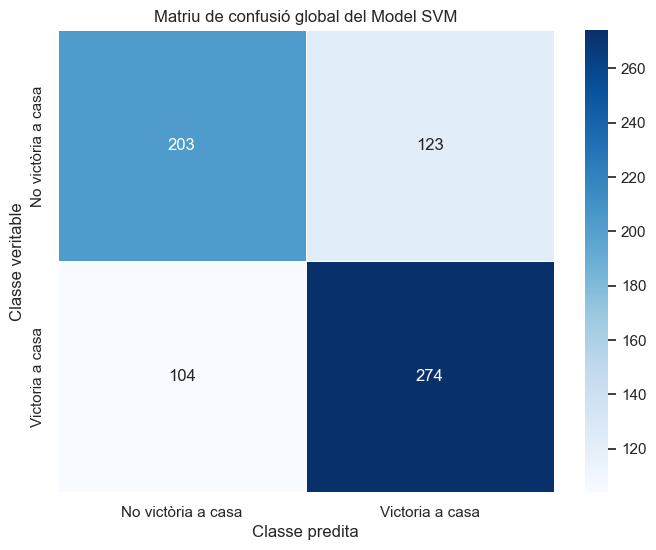

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importar biblioteca para gráficos
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay  # Importar display de matriz de confusión

# Preparación de los datos
jornadas['Home'] = jornadas['Home'].str.replace(' ', '', regex=False)
jornadas['Away'] = jornadas['Away'].str.replace(' ', '', regex=False)
team_vectors_df['CLUB'] = team_vectors_df['CLUB'].str.replace(' ', '', regex=False) 

# Unimos el vector de HPI para el equipo Home y el equipo Away
merged_df = jornadas.merge(team_vectors_df, left_on='Home', right_on='CLUB', suffixes=('', '_home'))
merged_df = merged_df.merge(team_vectors_df, left_on='Away', right_on='CLUB', suffixes=('', '_away'))

# Creación del vector de características
X_cols = [
    'HPI_GK', 'HPI_LW', 'HPI_LB', 'HPI_CB', 'HPI_RB', 'HPI_RW', 'HPI_PV', 'HPI_sub1', 'HPI_sub2',
    'HPI_GK_away', 'HPI_LW_away', 'HPI_LB_away', 'HPI_CB_away', 'HPI_RB_away', 
    'HPI_RW_away', 'HPI_PV_away', 'HPI_sub1_away', 'HPI_sub2_away'
]

X = merged_df[X_cols].values

# Creación de la variable objetivo
y = (merged_df['Res'] == 'H').astype(int)  # 'H' indica victoria del equipo de casa

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')  # Evaluar usando accuracy

# Realizar predicciones con cross_val_predict para obtener las predicciones de todos los folds
y_pred = cross_val_predict(svm_model, X, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)


# Métricas adicionales

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["No victòria a casa", "Victoria a casa"], yticklabels=["No victòria a casa", "Victoria a casa"])
plt.title("Matriu de confusió global del Model SVM")
plt.xlabel("Classe predita")
plt.ylabel("Classe veritable")
plt.show()

Cross-Validation Scores (Accuracy): [0.64539007 0.72340426 0.66666667 0.65248227 0.7       ]
Mean Accuracy: 0.6776
Standard Deviation of Accuracy: 0.0296
Sensitivity (TPR): 0.7249
Specificity (TNR): 0.6227
F1-score Promedio: 0.6767
Classification Report:
                    precision    recall  f1-score   support

No victoria a casa       0.66      0.62      0.64       326
   Victoria a casa       0.69      0.72      0.71       378

          accuracy                           0.68       704
         macro avg       0.68      0.67      0.67       704
      weighted avg       0.68      0.68      0.68       704



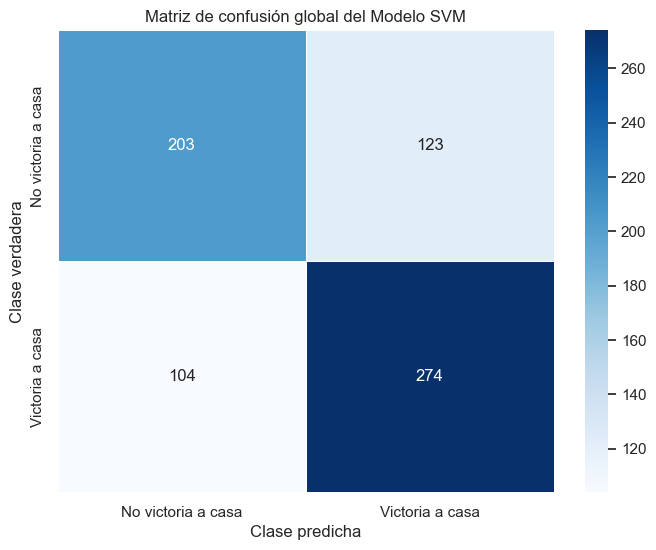

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Preparación de los datos
jornadas['Home'] = jornadas['Home'].str.replace(' ', '', regex=False)
jornadas['Away'] = jornadas['Away'].str.replace(' ', '', regex=False)
team_vectors_df['CLUB'] = team_vectors_df['CLUB'].str.replace(' ', '', regex=False)

# Unimos el vector de HPI para el equipo Home y el equipo Away
merged_df = jornadas.merge(team_vectors_df, left_on='Home', right_on='CLUB', suffixes=('', '_home'))
merged_df = merged_df.merge(team_vectors_df, left_on='Away', right_on='CLUB', suffixes=('', '_away'))

# Creación del vector de características
X_cols = [
    'HPI_GK', 'HPI_LW', 'HPI_LB', 'HPI_CB', 'HPI_RB', 'HPI_RW', 'HPI_PV', 'HPI_sub1', 'HPI_sub2',
    'HPI_GK_away', 'HPI_LW_away', 'HPI_LB_away', 'HPI_CB_away', 'HPI_RB_away', 
    'HPI_RW_away', 'HPI_PV_away', 'HPI_sub1_away', 'HPI_sub2_away'
]
X = merged_df[X_cols].values

# Creación de la variable objetivo
y = (merged_df['Res'] == 'H').astype(int)  # 'H' indica victoria del equipo de casa

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar usando accuracy
cv_scores = cross_val_score(svm_model, X, y, cv=kf, scoring='accuracy')

# Realizar predicciones con cross_val_predict para obtener las predicciones de todos los folds
y_pred = cross_val_predict(svm_model, X, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)

# Calcular métricas adicionales a partir de la matriz de confusión
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

# Sensibilidad (TPR)
TPR = TP / (TP + FN)

# Especificidad (TNR)
TNR = TN / (TN + FP)

# Calcular F1-score promedio
report_dict = classification_report(y, y_pred, output_dict=True)
average_f1_score = report_dict['weighted avg']['f1-score']

# Imprimir las métricas de Cross-Validation
print("Cross-Validation Scores (Accuracy):", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")
print(f"Sensitivity (TPR): {TPR:.4f}")
print(f"Specificity (TNR): {TNR:.4f}")
print(f"F1-score Promedio: {average_f1_score:.4f}")

# Imprimir el classification report completo
print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No victoria a casa", "Victoria a casa"]))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["No victoria a casa", "Victoria a casa"], yticklabels=["No victoria a casa", "Victoria a casa"])
plt.title("Matriz de confusión global del Modelo SVM")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


#### Premutation Testing

In [ ]:
from sklearn.model_selection import permutation_test_score
estimator = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
score, permutation_scores, pvalue = permutation_test_score(estimator, X, y, random_state=0,n_permutations=1000, cv=kf)
print(f"Original Score: {score:.4f}")
print(
    f"Permutation Scores: {permutation_scores.mean():.3f} +/- "
    f"{permutation_scores.std():.4f}"
)
print(f"P-value: {pvalue:.4f}")

## PCA

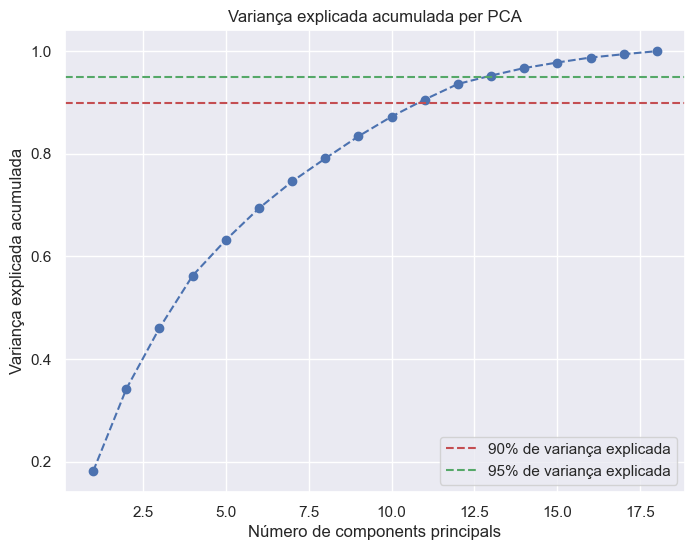

In [100]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

# Graficar la varianza acumulada
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Número de components principals')
plt.ylabel('Variança explicada acumulada')
plt.title('Variança explicada acumulada per PCA')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de variança explicada')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% de variança explicada')
plt.legend()
plt.show()


In [101]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Crear el PCA (reduciendo a 2 componentes principales para visualización)
pca95 = PCA(n_components=14)
pca90 = PCA(n_components=11)
# Aplicar el PCA sobre X
X_pca95 = pca95.fit_transform(X)
X_pca90 = pca90.fit_transform(X)


## 95%

Cross-Validation Scores: [0.66666667 0.74468085 0.65248227 0.65957447 0.68571429]
Mean Accuracy: 0.6818237082066869
Standard Deviation of Accuracy: 0.03332218966667621


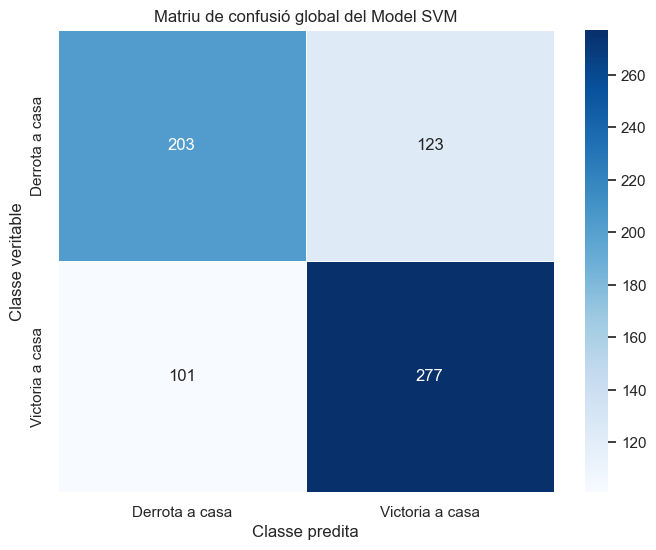

Cross-Validation Scores (Accuracy): [0.66666667 0.74468085 0.65248227 0.65957447 0.68571429]
Mean Accuracy: 0.6818
Standard Deviation of Accuracy: 0.0333
Sensitivity (TPR): 0.7249
Specificity (TNR): 0.6227
F1-score Promedio: 0.6767


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importar biblioteca para gráficos
from sklearn.model_selection import KFold, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay  # Importar display de matriz de confusión

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(svm_model, X_pca95, y, cv=kf, scoring='accuracy')  # Evaluar usando accuracy

# Realizar predicciones con cross_val_predict para obtener las predicciones de todos los folds
y_pred = cross_val_predict(svm_model, X_pca95, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)


# Métricas adicionales
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["Derrota a casa", "Victoria a casa"], yticklabels=["Derrota a casa", "Victoria a casa"])
plt.title("Matriu de confusió global del Model SVM")
plt.xlabel("Classe predita")
plt.ylabel("Classe veritable")
plt.show()

# Imprimir las métricas de Cross-Validation
print("Cross-Validation Scores (Accuracy):", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")
print(f"Sensitivity (TPR): {TPR:.4f}")
print(f"Specificity (TNR): {TNR:.4f}")
print(f"F1-score Promedio: {average_f1_score:.4f}")


In [103]:
from sklearn.model_selection import permutation_test_score
estimator = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
score, permutation_scores, pvalue = permutation_test_score(estimator, X_pca95, y, random_state=0,n_permutations=1000, cv=kf)
print(f"Original Score: {score:.4f}")
print(
    f"Permutation Scores: {permutation_scores.mean():.3f} +/- "
    f"{permutation_scores.std():.4f}"
)
print(f"P-value: {pvalue:.4f}")

Original Score: 0.6818
Permutation Scores: 0.503 +/- 0.0235
P-value: 0.0010


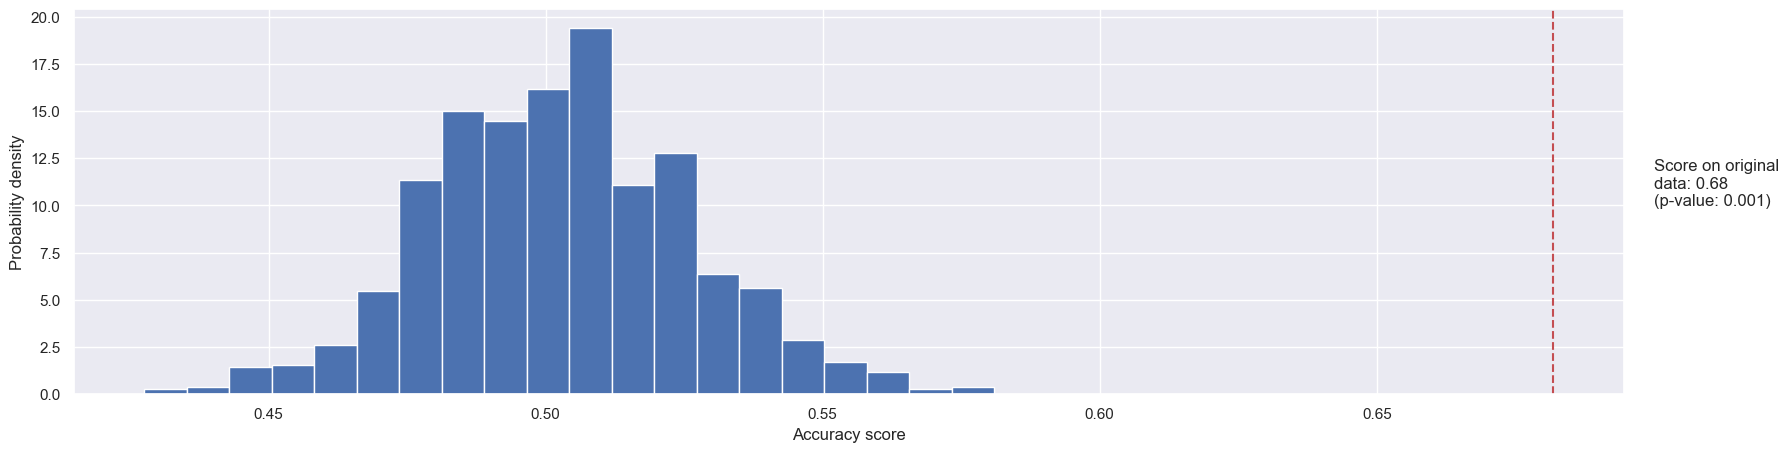

In [104]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.hist(permutation_scores, bins=20, density=True)
ax.axvline(score, ls="--", color="r")
score_label = f"Score on original\ndata: {score:.2f}\n(p-value: {pvalue:.3f})"
ax.text(0.7, 10, score_label, fontsize=12)
ax.set_xlabel("Accuracy score")
_ = ax.set_ylabel("Probability density")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # Importar biblioteca para gráficos
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar usando accuracy
cv_scores = cross_val_score(svm_model, X_pca95, y, cv=kf, scoring='accuracy')

# Realizar predicciones con crimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Preparación de los datos
jornadas['Home'] = jornadas['Home'].str.replace(' ', '', regex=False)
jornadas['Away'] = jornadas['Away'].str.replace(' ', '', regex=False)
team_vectors_df['CLUB'] = team_vectors_df['CLUB'].str.replace(' ', '', regex=False)

# Unimos el vector de HPI para el equipo Home y el equipo Away
merged_df = jornadas.merge(team_vectors_df, left_on='Home', right_on='CLUB', suffixes=('', '_home'))
merged_df = merged_df.merge(team_vectors_df, left_on='Away', right_on='CLUB', suffixes=('', '_away'))

# Creación del vector de características
X_cols = [
    'HPI_GK', 'HPI_LW', 'HPI_LB', 'HPI_CB', 'HPI_RB', 'HPI_RW', 'HPI_PV', 'HPI_sub1', 'HPI_sub2',
    'HPI_GK_away', 'HPI_LW_away', 'HPI_LB_away', 'HPI_CB_away', 'HPI_RB_away', 
    'HPI_RW_away', 'HPI_PV_away', 'HPI_sub1_away', 'HPI_sub2_away'
]
X = merged_df[X_cols].values

# Creación de la variable objetivo
y = (merged_df['Res'] == 'H').astype(int)  # 'H' indica victoria del equipo de casa

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar usando accuracy
cv_scores = cross_val_score(svm_model, X_pca95, y, cv=kf, scoring='accuracy')

# Realizar predicciones con cross_val_predict para obtener las predicciones de todos los folds
y_pred = cross_val_predict(svm_model, X_pca95, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)

# Calcular métricas adicionales a partir de la matriz de confusión
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

# Sensibilidad (TPR)
TPR = TP / (TP + FN)

# Especificidad (TNR)
TNR = TN / (TN + FP)

# Calcular F1-score promedio
report_dict = classification_report(y, y_pred, output_dict=True)
average_f1_score = report_dict['weighted avg']['f1-score']

# Imprimir las métricas de Cross-Validation
print("Cross-Validation Scores (Accuracy):", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")
print(f"Sensitivity (TPR): {TPR:.4f}")
print(f"Specificity (TNR): {TNR:.4f}")
print(f"F1-score Promedio: {average_f1_score:.4f}")

# Imprimir el classification report completo
print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No victoria a casa", "Victoria a casa"]))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["No victoria a casa", "Victoria a casa"], yticklabels=["No victoria a casa", "Victoria a casa"])
plt.title("Matriz de confusión global del Modelo SVM")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()
y_pred = cross_val_predict(svm_model, X_pca95, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)

# Imprimir las métricas de Cross-Validation
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

# Imprimir el classification report
report = classification_report(y, y_pred, target_names=["Derrota a casa", "Victoria a casa"])
print("Classification Report:")
print(report)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["Derrota a casa", "Victoria a casa"], yticklabels=["Derrota a casa", "Victoria a casa"])
plt.title("Matriu de confusió global del Model SVM")
plt.xlabel("Classe predita")
plt.ylabel("Classe veritable")
plt.show()


## 90%

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Preparación de los datos
jornadas['Home'] = jornadas['Home'].str.replace(' ', '', regex=False)
jornadas['Away'] = jornadas['Away'].str.replace(' ', '', regex=False)
team_vectors_df['CLUB'] = team_vectors_df['CLUB'].str.replace(' ', '', regex=False)

# Unimos el vector de HPI para el equipo Home y el equipo Away
merged_df = jornadas.merge(team_vectors_df, left_on='Home', right_on='CLUB', suffixes=('', '_home'))
merged_df = merged_df.merge(team_vectors_df, left_on='Away', right_on='CLUB', suffixes=('', '_away'))

# Creación del vector de características
X_cols = [
    'HPI_GK', 'HPI_LW', 'HPI_LB', 'HPI_CB', 'HPI_RB', 'HPI_RW', 'HPI_PV', 'HPI_sub1', 'HPI_sub2',
    'HPI_GK_away', 'HPI_LW_away', 'HPI_LB_away', 'HPI_CB_away', 'HPI_RB_away', 
    'HPI_RW_away', 'HPI_PV_away', 'HPI_sub1_away', 'HPI_sub2_away'
]
X = merged_df[X_cols].values

# Creación de la variable objetivo
y = (merged_df['Res'] == 'H').astype(int)  # 'H' indica victoria del equipo de casa

# Inicializar el modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Configuración de K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluar usando accuracy
cv_scores = cross_val_score(svm_model, X_pca90, y, cv=kf, scoring='accuracy')

# Realizar predicciones con cross_val_predict para obtener las predicciones de todos los folds
y_pred = cross_val_predict(svm_model, X_pca90, y, cv=kf)

# Crear la matriz de confusión total
conf_matrix = confusion_matrix(y, y_pred)

# Calcular métricas adicionales a partir de la matriz de confusión
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]
TN = conf_matrix[0, 0]

# Sensibilidad (TPR)
TPR = TP / (TP + FN)

# Especificidad (TNR)
TNR = TN / (TN + FP)

# Calcular F1-score promedio
report_dict = classification_report(y, y_pred, output_dict=True)
average_f1_score = report_dict['weighted avg']['f1-score']

# Imprimir las métricas de Cross-Validation
print("Cross-Validation Scores (Accuracy):", cv_scores)
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Accuracy: {np.std(cv_scores):.4f}")
print(f"Sensitivity (TPR): {TPR:.4f}")
print(f"Specificity (TNR): {TNR:.4f}")
print(f"F1-score Promedio: {average_f1_score:.4f}")

# Imprimir el classification report completo
print("Classification Report:")
print(classification_report(y, y_pred, target_names=["No victoria a casa", "Victoria a casa"]))

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, linewidths=0.5, xticklabels=["No victoria a casa", "Victoria a casa"], yticklabels=["No victoria a casa", "Victoria a casa"])
plt.title("Matriz de confusión global del Modelo SVM")
plt.xlabel("Clase predicha")
plt.ylabel("Clase verdadera")
plt.show()


In [ ]:
from sklearn.model_selection import permutation_test_score
estimator = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
score, permutation_scores, pvalue = permutation_test_score(estimator, X_pca90, y, random_state=0,n_permutations=1000, cv=kf)
print(f"Original Score: {score:.4f}")
print(
    f"Permutation Scores: {permutation_scores.mean():.3f} +/- "
    f"{permutation_scores.std():.4f}"
)
print(f"P-value: {pvalue:.4f}")